# R12 Beta run

In [1]:
import numpy as np
import pickle as rick
import matplotlib.pyplot as plt
import matplotlib
import astropy.units as u
from astropy.table import Table
from astropy.io import fits
import scipy.stats as sps
import matplotlib.colors as colors
import scipy
import os

In [2]:
import sys
from os.path import dirname
sys.path.append("/home/cody/Binary Search/pybay")
import bayli

In [3]:
lmc = rick.load(open("/home/cody/Binary Search/R12 Run/lmc-r12-l33beta.pck", 'rb'))
smc = rick.load(open("/home/cody/Binary Search/R12 Run/smc-r12-l33beta.pck", 'rb'))

In [4]:
foo = [item for sublist in lmc['RADIAL_ERR'] for item in sublist]
# plt.hist(foo,

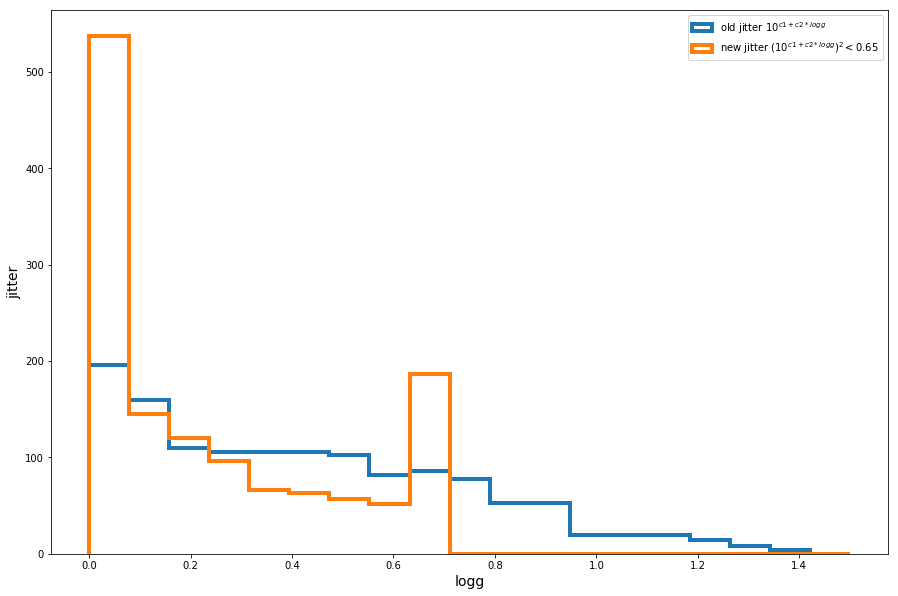

In [5]:
c1 = 0.15
c2 = -1
plt.figure(figsize = (15,10))
foo = [(10**(c1 + c2*lg))**2 if (10**(c1 + c2*lg))**2 < 0.65 else 0.65 for lg in lmc['LOGG']]
foo2 = 10 ** (c1 + c2 * lmc['LOGG'])
plt.hist(foo2, label = 'old jitter $10^{c1+c2*logg}$',
         histtype='step', lw = 4, bins = np.linspace(0,1.5,20))
plt.hist(foo, label = 'new jitter $(10^{c1+c2*logg})^2 < 0.65$',
         histtype='step', lw =4,  bins = np.linspace(0,1.5,20))
plt.xlabel("logg", size = 14)
plt.ylabel('jitter', size = 14)
plt.legend()

In [6]:
lmc

RADIALV,RADIAL_ERR,OG_RADIAL_ERR,RADIAL_DATE,APOGEE_ID,FIELD,NVISITS,SNR,VHELIO_AVG,VERR,VSCATTER,TEFF,TEFF_ERR,LOGG,LOGG_ERR,FE_H,FE_H_ERR,RV_TEFF,RV_LOGG,RV_FEH,MY_NVISITS,ISO_MASS,ISO_LUM,ISO_RAD,ISO_FIT_DIST
,,,,,,,,,,,,,,,,,,,,,solMass,solLum,solRad,
object,object,object,object,str18,str16,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float64,float64,float64,float64
[232.71423 233.0006 232.82678 233.48077 232.71996 232.63113],[0.15657212 0.14836683 0.13771439 0.17252719 0.27568811 0.21726919],[0.06800607 0.06418958 0.05906274 0.07516767 0.11681755 0.09398492],[2458029.78298 2458032.75775 2458055.66794 2458094.59393 2458115.52039 2458119.52177],2M04015195-6826505,LMC2,6,58.9679,232.916,0.0310103,0.313648,4071.8918,99.28176,1.0163207,0.05855874,-0.83068633,0.020461017,4000.0,0.5,-1.0,6,1.2860000133514404,872.9713377165597,59.369170018001064,0.008306249044835567
[233.55309 233.6064 233.2084 234.68584 234.1073 ],[0.2583855 0.22433327 0.2608863 0.26529482 0.43959317],[0.11020647 0.09683142 0.11116894 0.11285975 0.17548165],[2458029.78298 2458032.75775 2458055.66794 2458094.59393 2458119.52177],2M04024888-6843110,LMC2,5,63.4098,233.813,0.0515061,0.574975,4270.234,112.086426,1.0638863,0.074231416,-1.5016663,0.026390817,4250.0,1.0,-1.5,5,0.8080000281333923,654.6361510668559,46.746610697553734,0.025965509936213493
[217.65451 217.23831 217.68497 217.61157 217.85457 218.2279 ],[0.11281998 0.1066319 0.09258632 0.12519349 0.1389839 0.22811445],[0.04595001 0.04230334 0.03291788 0.05271363 0.05968541 0.09834391],[2458029.78298 2458032.75775 2458055.66794 2458094.59393 2458115.52039 2458119.52177],2M04032565-6817363,LMC2,6,79.4209,217.646,0.020081,0.324033,3995.033,93.26685,0.56347823,0.05976843,-0.92044634,0.020464242,4000.0,0.5,-1.0,6,0.7490000128746033,1336.5952934825214,76.31548867293843,0.00660866592079401
[235.44357 234.98477 235.24593 235.1173 235.12958 235.19133],[0.23467738 0.20295123 0.19488927 0.25961158 0.31126685 0.45984513],[0.10095171 0.08812426 0.08476412 0.11067865 0.13009778 0.18237337],[2458029.78298 2458032.75775 2458055.66794 2458094.59393 2458115.52039 2458119.52177],2M04034063-6836500,LMC2,6,69.2486,235.188,0.0443018,0.153856,4529.7593,113.992386,1.7593024,0.07010071,-1.0839664,0.019387119,4750.0,2.0,-1.0,6,0.8479999899864197,162.9295631926434,20.72541161721913,0.015274290926754475
[223.05186 223.37538 223.27936 222.60027 223.37643 223.17177],[0.39886794 0.36440533 0.34058771 0.34688661 0.79290921 0.45232309],[0.16142584 0.14929938 0.14077568 0.14304219 0.28915536 0.17982076],[2458029.78298 2458032.75775 2458055.66794 2458094.59393 2458115.52039 2458119.52177],2M04034857-6848236,LMC2,6,71.1541,223.129,0.0683645,0.293523,4391.4766,115.4173,0.82408303,0.07991151,-1.6804663,0.026351817,4250.0,1.0,-2.0,6,1.0889999866485596,1496.2354918140318,66.82397130288582,0.01853283680975437
[12.880848 14.188863 13.327595 14.344133 15.304016 13.721668],[0.45563601 0.39543386 0.42823362 0.38084969 0.68097376 0.49785617],[0.18094602 0.1602276 0.17158851 0.15511441 0.2544003 0.19515142],[2458029.78298 2458032.75775 2458055.66794 2458094.59393 2458115.52039 2458119.52177],2M04035208-6845265,LMC2,6,62.7329,13.8712,0.0734632,0.851776,5218.178,143.40222,2.336067,0.07350679,-0.96969634,0.022839969,5000.0,2.0,-1.0,6,0.8180000185966492,68.07692719888216,10.095216058669676,0.009182813577353954
[268.88968 268.59064 268.9257 267.9359 267.2131 267.6868 ],[0.22842199 0.18605139 0.16290265 0.24204236 0.35123944 0.73401669],[0.0984666 0.08102383 0.07088486 0.10385335 0.14460318 0.27098715],[2458029.78298 2458032.75775 2458055.66794 2458094.59393 2458115.52039 2458119.52177],2M04035891-6814582,LMC2,6,87.5962,268.376,0.0440167,0.701665,4207.493,106.560524,0.54597986,0.07942656,-1.7394663,0.027628558,4250.0,1.0,-1.5,6,1.0509999990463257,2301.441756763227,90.28312903256264,0.040509581565856934
[29.900446 29.865595 29.89624 29.790257 29.979445 29.49685 ],[0.19515121 0.20586791 0.31337

(array([3.069e+03, 6.070e+03, 4.450e+02, 4.400e+01, 1.100e+01, 4.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([0.12328904, 0.44627861, 0.76926818, 1.09225776, 1.41524733,
        1.7382369 , 2.06122647, 2.38421605, 2.70720562, 3.03019519,
        3.35318476]),
 <a list of 10 Patch objects>)

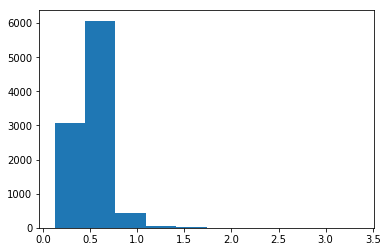

In [8]:
bob = bayli.error_with_jitter(lmc['RADIAL_ERR'], 0.15, -1, foo)
bob = [item for sublist in bob for item in sublist]
plt.figure
plt.hist(bob)

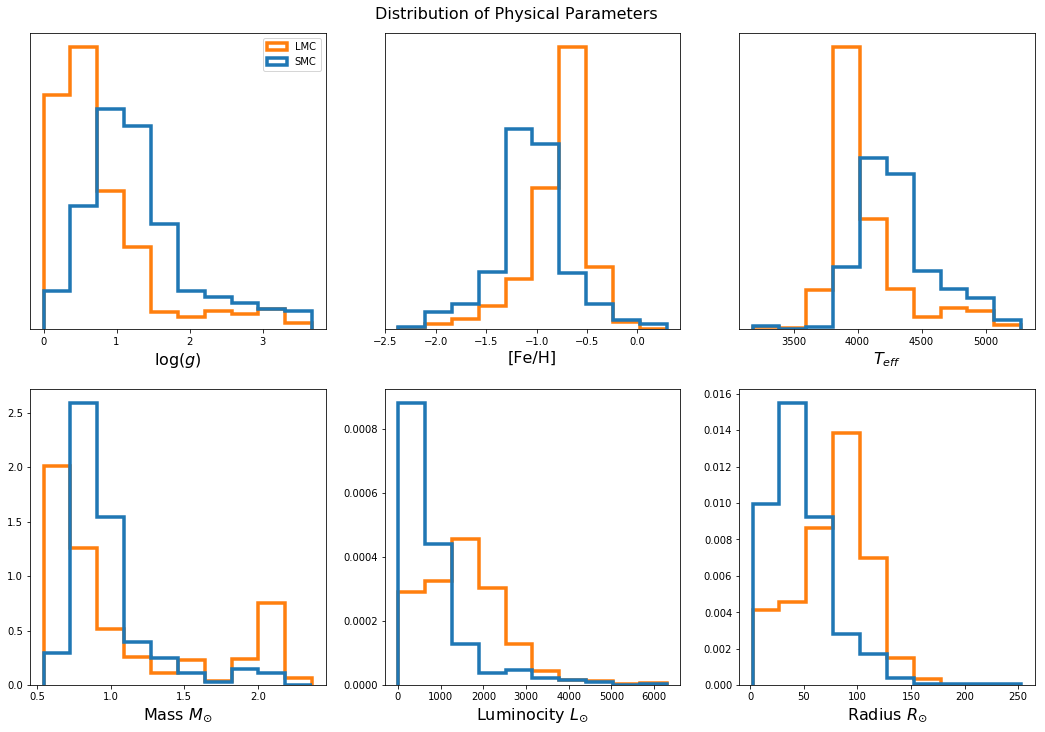

In [7]:
fig, ax = plt.subplots(2, 3, figsize = (18,12))
matplotlib.rc('xtick', labelsize=13)
matplotlib.rc('ytick', labelsize=13)

ax[0][0].hist([smc['LOGG'], lmc['LOGG']],
           histtype='step',
           density= True,
           linewidth = 3.5,
           label = ["SMC", "LMC"])
ax[0][1].hist([smc['FE_H'], lmc['FE_H']],
           histtype='step',
           density= True,
           linewidth = 3.5)
ax[0][2].hist([smc['TEFF'], lmc['TEFF']],
           histtype='step',
           density= True,
           linewidth = 3.5)

ax[1][0].hist([smc['ISO_MASS'], lmc['ISO_MASS']],
           histtype='step',
           density= True,
           linewidth = 3.5,
           label = ["SMC", "LMC"])
ax[1][1].hist([smc['ISO_LUM'], lmc['ISO_LUM']],
           histtype='step',
           density= True,
           linewidth = 3.5)
ax[1][2].hist([smc['ISO_RAD'], lmc['ISO_RAD']],
           histtype='step',
           density= True,
           linewidth = 3.5)

ax[0][0].legend()

ax[0][0].set_xlabel("$\log(g)$", size = 16)
ax[0][1].set_xlabel("[Fe/H]", size = 16)
ax[0][2].set_xlabel("$T_{eff}$", size = 16)

ax[1][0].set_xlabel("Mass $M_{\odot}$", size = 16)
ax[1][1].set_xlabel("Luminocity $L_{\odot}$", size = 16)
ax[1][2].set_xlabel("Radius $R_{\odot}$", size = 16)

ax[0][0].set_yticks([])
ax[0][1].set_yticks([])
ax[0][2].set_yticks([])


fig.suptitle("Distribution of Physical Parameters", size = 16, y = 0.91)
fig.savefig('r12-beta-properties-hist.pdf')
plt.show()

In [10]:
c1, c2 = 0.15, -1
mf = 1
fraction_lmc = bayli.synthetic_fractions(200,
                                   lmc,
                                   mf,
                                   150*u.jupiterMass,
                                   3.2,
                                   2.4,
                                   c1,
                                   c2)
fraction_smc = bayli.synthetic_fractions(200,
                                   smc,
                                   mf,
                                   150*u.jupiterMass,
                                   3.2,
                                   2.4,
                                   c1,
                                   c2)


In [11]:
lmc_err_j = bayli.error_with_jitter(lmc['RADIAL_ERR'], c1, c2, lmc['LOGG'])
lmc_detection = bayli.binary_fraction(lmc['RADIALV'], lmc_err_j)
smc_err_j = bayli.error_with_jitter(smc['RADIAL_ERR'], c1, c2, smc['LOGG'])
smc_detection = bayli.binary_fraction(smc['RADIALV'], smc_err_j)

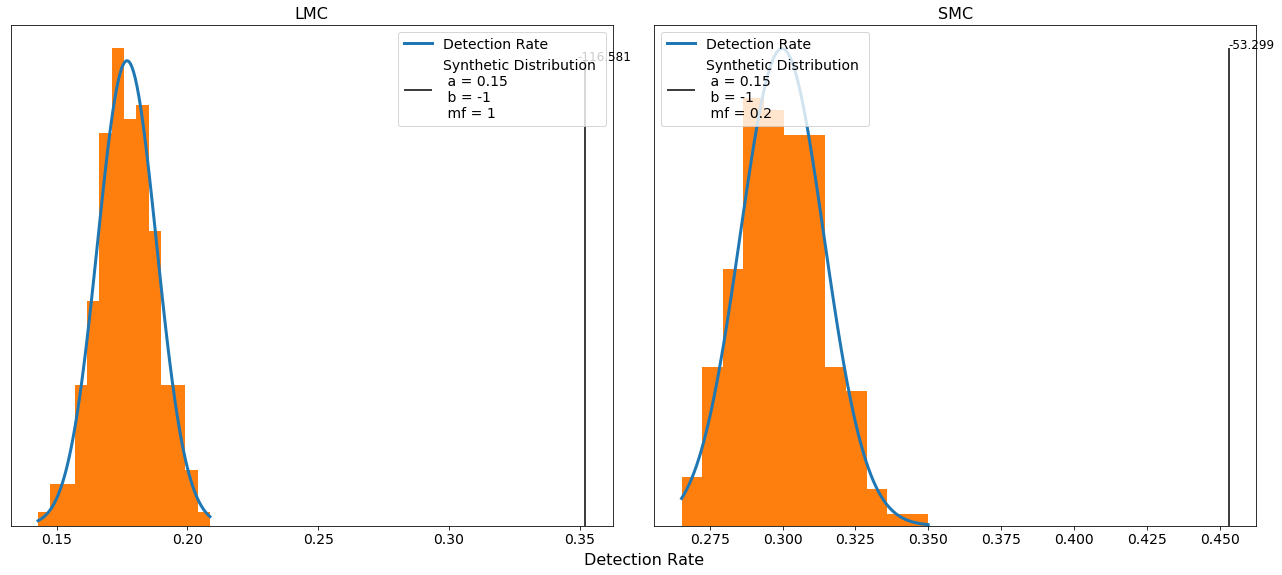

In [12]:
fig, ax = plt.subplots(1,2, figsize = (18,8))
fig.text(0.5, 0.02, 'Detection Rate', ha='center', va='center', size = 16)

lmc_mean = np.mean(fraction_lmc)
lmc_std = np.std(fraction_lmc)
lmc_skew = sps.skew(fraction_lmc)

lnl_LMC = -1/2*((lmc_detection - lmc_mean)**2 / lmc_std**2 + np.log(2*np.pi * lmc_std**2))

xl = np.linspace(min(fraction_lmc), max(fraction_lmc), 100)

smc_mean = np.mean(fraction_smc)
smc_std = np.std(fraction_smc)
smc_skew = sps.skew(fraction_smc)

lnl_SMC = -1/2*((smc_detection - smc_mean)**2 / smc_std**2 + np.log(2*np.pi * smc_std**2))

xs = np.linspace(min(fraction_smc), max(fraction_smc), 100)

ax[0].plot(xl, sps.norm.pdf(xl, lmc_mean, lmc_std), linewidth = 3)
ax[0].hist(fraction_lmc, bins = 'auto', density = True)
ax[0].vlines(lmc_detection, 0, max(sps.norm.pdf(xl, lmc_mean, lmc_std)))
ax[0].set_yticks([])
ax[0].set_title("LMC", size = 16)
ax[0].legend(["Detection Rate",
             "Synthetic Distribution \n a = {} \n b = {} \n mf = {}".format(c1, c2, mf)],
             prop = {"size":14}) 
ax[0].text(lmc_detection-.003,
           max(sps.norm.pdf(xl, lmc_mean, lmc_std))
           , "{0:.{1}f}".format(lnl_LMC,3), fontsize=12)

ax[1].plot(xs, sps.norm.pdf(xs, smc_mean, smc_std), linewidth = 3)
ax[1].hist(fraction_smc, bins = 'auto', density = True)
ax[1].vlines(smc_detection, 0, max(sps.norm.pdf(xs, smc_mean, smc_std)))
ax[1].set_yticks([])
ax[1].set_title("SMC", size = 16)
ax[1].legend(["Detection Rate",
             "Synthetic Distribution \n a = {} \n b = {} \n mf = 0.2".format(c1, c2,mf)],
             prop = {"size":14}, loc = 2)
ax[1].text(smc_detection,
           max(sps.norm.pdf(xs, smc_mean, smc_std))
           , "{0:.{1}f}".format(lnl_SMC,3), fontsize=12)

ax[0].tick_params( labelsize=14)
ax[1].tick_params( labelsize=14)
fig.tight_layout()
fig.subplots_adjust(bottom=0.08)
fig.savefig("synthetic-example-new-jitter-and-error.pdf")
plt.show()

In [9]:
c1, c2 = 0.15, -1
mf = 1
fraction_lmc = bayli.synthetic_fractions(125,
                                   lmc,
                                   mf,
                                   150*u.jupiterMass,
                                   3.2,
                                   2.4,
                                   c1,
                                   c2)
fraction_lmc2 = bayli.synthetic_fractions(125,
                                   lmc,
                                   0.2,
                                   150*u.jupiterMass,
                                   3.2,
                                   2.4,
                                   c1,
                                   c2)


In [10]:
lmc_err_j = bayli.error_with_jitter(lmc['RADIAL_ERR'], c1, c2, lmc['LOGG'])
lmc_detection = bayli.binary_fraction(lmc['RADIALV'], lmc_err_j)
# lmc_err_j2 = bayli.error_with_jitter(lmc['RADIAL_ERR'], c1, c2, lmc['LOGG'])
# lmc_detection2 = bayli.binary_fraction(lmc['RADIALV'], lmc_err_j2)

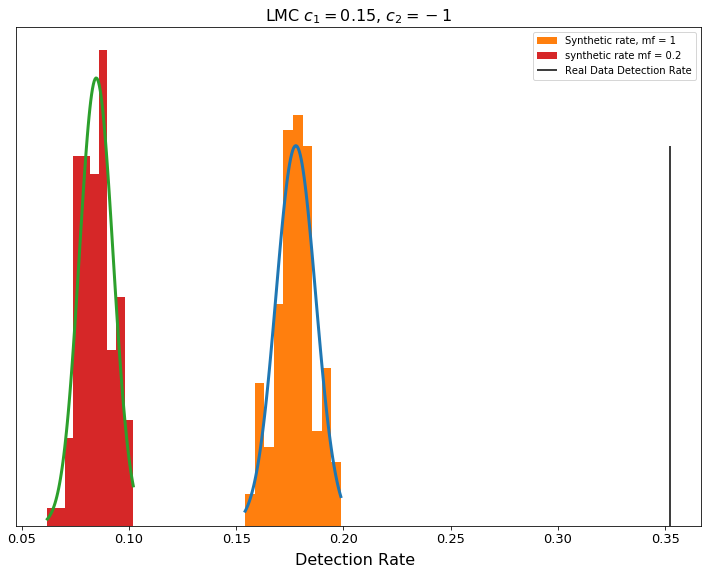

In [39]:
fig = plt.figure(figsize = (10,8))
fig.text(0.5, 0.02, 'Detection Rate', ha='center', va='center', size = 16)

lmc_mean = np.mean(fraction_lmc)
lmc_std = np.std(fraction_lmc)
lmc_skew = sps.skew(fraction_lmc)

lnl_LMC = -1/2*((lmc_detection - lmc_mean)**2 / lmc_std**2 + np.log(2*np.pi * lmc_std**2))

xl = np.linspace(min(fraction_lmc), max(fraction_lmc), 100)

lmc_mean2 = np.mean(fraction_lmc2)
lmc_std2 = np.std(fraction_lmc2)
lmc_skew2 = sps.skew(fraction_lmc2)

lnl_LMC2 = -1/2*((lmc_detection - lmc_mean2)**2 / lmc_std2**2 + np.log(2*np.pi * lmc_std2**2))

xl2 = np.linspace(min(fraction_lmc2), max(fraction_lmc2), 100)

plt.plot(xl, sps.norm.pdf(xl, lmc_mean, lmc_std), linewidth = 3)
plt.hist(fraction_lmc, bins = 'auto', density = True, label = "Synthetic rate, mf = 1")

plt.plot(xl2, sps.norm.pdf(xl2, lmc_mean2, lmc_std2), linewidth = 3)
plt.hist(fraction_lmc2, bins = 'auto', density = True, label = "synthetic rate mf = 0.2")


plt.vlines(lmc_detection, 0, max(sps.norm.pdf(xl, lmc_mean, lmc_std)), label = 'Real Data Detection Rate')
plt.yticks([])
plt.title("LMC $c_1 = {}$, $c_2 = {}$".format(c1, c2), size = 16)
plt.legend() 
# plt.text(lmc_detection-.003,
#            max(sps.norm.pdf(xl, lmc_mean, lmc_std))
#            , "{0:.{1}f}".format(lnl_LMC,3), fontsize=12)



ax[0].tick_params( labelsize=14)
ax[1].tick_params( labelsize=14)
fig.tight_layout()
fig.subplots_adjust(bottom=0.08)
fig.savefig("synthetic-example-lmc-new-jitter.pdf")

plt.show()

In [158]:
c1, c2 = -0.04, -0.3
mf = 1
fraction_lmc = bayli.synthetic_fractions(150,
                                   lmc,
                                   mf,
                                   150*u.jupiterMass,
                                   3.2,
                                   2.4,
                                   c1,
                                   c2)
fraction_lmc2 = bayli.synthetic_fractions(150,
                                   lmc,
                                   0.2,
                                   150*u.jupiterMass,
                                   3.2,
                                   2.4,
                                   c1,
                                   c2)


In [159]:
lmc_err_j = bayli.error_with_jitter(lmc['RADIAL_ERR'], c1, c2, lmc['LOGG'])
lmc_detection = bayli.binary_fraction(lmc['RADIALV'], lmc_err_j)

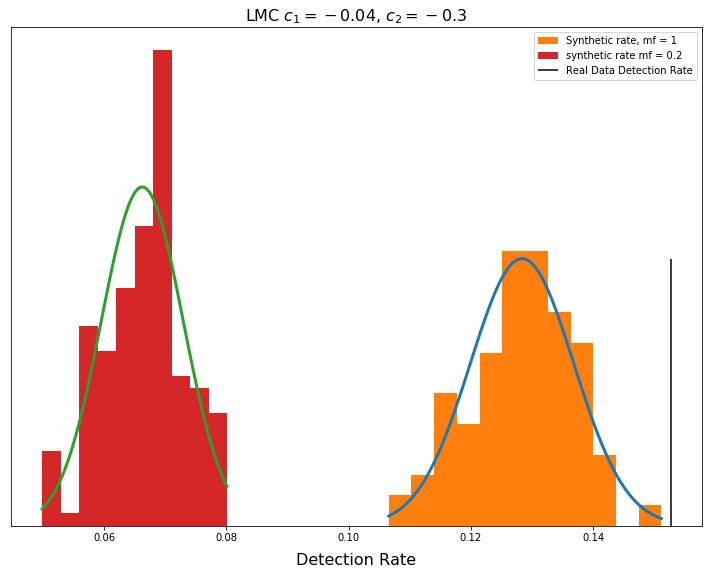

In [160]:
fig = plt.figure(figsize = (10,8))
fig.text(0.5, 0.02, 'Detection Rate', ha='center', va='center', size = 16)

lmc_mean = np.mean(fraction_lmc)
lmc_std = np.std(fraction_lmc)
lmc_skew = sps.skew(fraction_lmc)

lnl_LMC = -1/2*((lmc_detection - lmc_mean)**2 / lmc_std**2 + np.log(2*np.pi * lmc_std**2))

xl = np.linspace(min(fraction_lmc), max(fraction_lmc), 100)

lmc_mean2 = np.mean(fraction_lmc2)
lmc_std2 = np.std(fraction_lmc2)
lmc_skew2 = sps.skew(fraction_lmc2)

lnl_LMC2 = -1/2*((lmc_detection - lmc_mean2)**2 / lmc_std2**2 + np.log(2*np.pi * lmc_std2**2))

xl2 = np.linspace(min(fraction_lmc2), max(fraction_lmc2), 100)

plt.plot(xl, sps.norm.pdf(xl, lmc_mean, lmc_std), linewidth = 3)
plt.hist(fraction_lmc, bins = 'auto', density = True, label = "Synthetic rate, mf = 1")

plt.plot(xl2, sps.norm.pdf(xl2, lmc_mean2, lmc_std2), linewidth = 3)
plt.hist(fraction_lmc2, bins = 'auto', density = True, label = "synthetic rate mf = 0.2")


plt.vlines(lmc_detection, 0, max(sps.norm.pdf(xl, lmc_mean, lmc_std)), label = 'Real Data Detection Rate')
plt.yticks([])
plt.title("LMC $c_1 = {}$, $c_2 = {}$".format(c1, c2), size = 16)
plt.legend() 
# plt.text(lmc_detection-.003,
#            max(sps.norm.pdf(xl, lmc_mean, lmc_std))
#            , "{0:.{1}f}".format(lnl_LMC,3), fontsize=12)



ax[0].tick_params( labelsize=14)
ax[1].tick_params( labelsize=14)
fig.tight_layout()
fig.subplots_adjust(bottom=0.08)
fig.savefig("synthetic-example-lmc2.pdf")

plt.show()

[-0.11676333 -0.01346158] [[ 0.00023607 -0.00018091]
 [-0.00018091  0.00024565]]


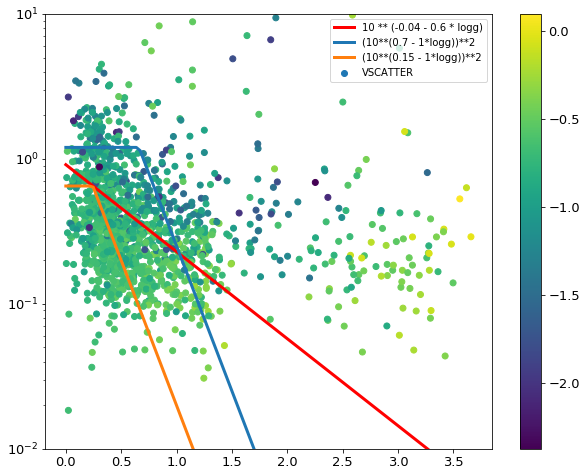

In [11]:
fig = plt.figure(figsize=(10,8))
logg = np.linspace(0,3.5,100)
plt.scatter(lmc['LOGG'], lmc['VSCATTER'], c = lmc['FE_H'])
plt.yscale('log')
plt.ylim(0.01,10)
# plt.plot(logg, 10**(0.3-0.6*logg), c='black', lw = 3, label = 'old')
plt.plot(logg, 10**(-0.04-0.6*logg), c='red', lw = 3, label = '10 ** (-0.04 - 0.6 * logg)')
# plt.plot(logg, 10**(0.3-0.6*logg), c='blue', lw = 3, label = 'Hekker')
foo, bar = scipy.optimize.curve_fit(lambda g,c1,c2: (10**(c1 + c2*g))**2,  lmc['LOGG'],  lmc['VSCATTER'],
                         p0=(-0.02, -0.8))

print(foo,bar)
c1 = 0.7
c2 = -1
foo = [(10**(c1 + c2*lg))**2 if (10**(c1 + c2*lg))**2 < 1.2 else 1.2 for lg in logg]
plt.plot(logg, foo, lw = 3, label ="(10**(0.7 - 1*logg))**2")

foo = [(10**(0.15 + c2*lg))**2 if (10**(0.15 + c2*lg))**2 < 0.65 else 0.65 for lg in logg]
plt.plot(logg, foo, lw = 3, label ="(10**(0.15 - 1*logg))**2")
plt.colorbar()
plt.legend()

In [48]:
(1 - (lmc['LOGG']-lmc["LOGG_ERR"])/lmc['LOGG'])*100

5.761838
6.9773793
10.607052
3.9845705
9.697026
3.1466067
14.547527
2.0779073
4.5651197
7.4817777
4.0630636


In [5]:
from multiprocessing import Pool
import functools

clist = [0.15, 0.1, -0.04, -0.15, -0.34]
pool = Pool()
answer_lmc = pool.map(functools.partial(bayli.likelihood_result,
                                        gal_path="/home/cody/Binary Search/R12 Run/lmc-r12-l33beta.pck",
                                        c2=-0.3,
                                        mu=3.4,
                                        sigma=2.4,
                                        m_min=100*u.jupiterMass),
                      clist)

Done with, 0 2019-06-28 15:10:28.578780
Done with, 0 2019-06-28 15:10:29.354774
Done with, 0 2019-06-28 15:10:31.393241
Done with, 0 2019-06-28 15:10:32.125539
Done with, 1 2019-06-28 15:13:23.927729
Done with, 1 2019-06-28 15:13:26.934161
Done with, 1 2019-06-28 15:13:27.623079
Done with, 1 2019-06-28 15:13:29.528672
Done with, 2 2019-06-28 15:16:52.015430
Done with, 2 2019-06-28 15:16:55.426902
Done with, 2 2019-06-28 15:16:55.892077
Done with, 2 2019-06-28 15:16:59.644971
Done with, 3 2019-06-28 15:20:56.339970
Done with, 3 2019-06-28 15:21:01.936266
Done with, 3 2019-06-28 15:21:02.075374
Done with, 3 2019-06-28 15:21:02.392678
Done with, 4 2019-06-28 15:25:37.758851
Done with, 4 2019-06-28 15:25:41.702445
Done with, 4 2019-06-28 15:25:41.894931
Done with, 4 2019-06-28 15:25:44.012469
Done with, 5 2019-06-28 15:30:54.795565
Done with, 5 2019-06-28 15:30:55.608539
Done with, 5 2019-06-28 15:30:57.963191
Done with, 5 2019-06-28 15:30:58.667290
Done with, 6 2019-06-28 15:36:32.079657


In [6]:
pool = Pool()
answer_smc = pool.map(functools.partial(bayli.likelihood_result,
                                        gal_path="/home/cody/Binary Search/R12 Run/smc-r12-l33beta.pck",
                                        c2=-0.3,
                                        mu=3.4,
                                        sigma=2.4,
                                        m_min=100*u.jupiterMass),
                      clist)

Done with, 0 2019-06-28 22:34:27.705458
Done with, 0 2019-06-28 22:34:28.256914
Done with, 0 2019-06-28 22:34:28.811121
Done with, 0 2019-06-28 22:34:29.281287
Done with, 1 2019-06-28 22:36:07.578356
Done with, 1 2019-06-28 22:36:07.996708
Done with, 1 2019-06-28 22:36:09.833712
Done with, 1 2019-06-28 22:36:10.275146
Done with, 2 2019-06-28 22:38:05.338362
Done with, 2 2019-06-28 22:38:05.722153
Done with, 2 2019-06-28 22:38:05.975294
Done with, 2 2019-06-28 22:38:09.609472
Done with, 3 2019-06-28 22:40:27.170643
Done with, 3 2019-06-28 22:40:32.063696
Done with, 3 2019-06-28 22:40:32.538593
Done with, 3 2019-06-28 22:40:33.401504
Done with, 4 2019-06-28 22:43:14.391507
Done with, 4 2019-06-28 22:43:15.491221
Done with, 4 2019-06-28 22:43:15.942200
Done with, 4 2019-06-28 22:43:20.846260
Done with, 5 2019-06-28 22:46:17.953691
Done with, 5 2019-06-28 22:46:20.076294
Done with, 5 2019-06-28 22:46:25.030973
Done with, 5 2019-06-28 22:46:31.923333
Done with, 6 2019-06-28 22:49:48.474924


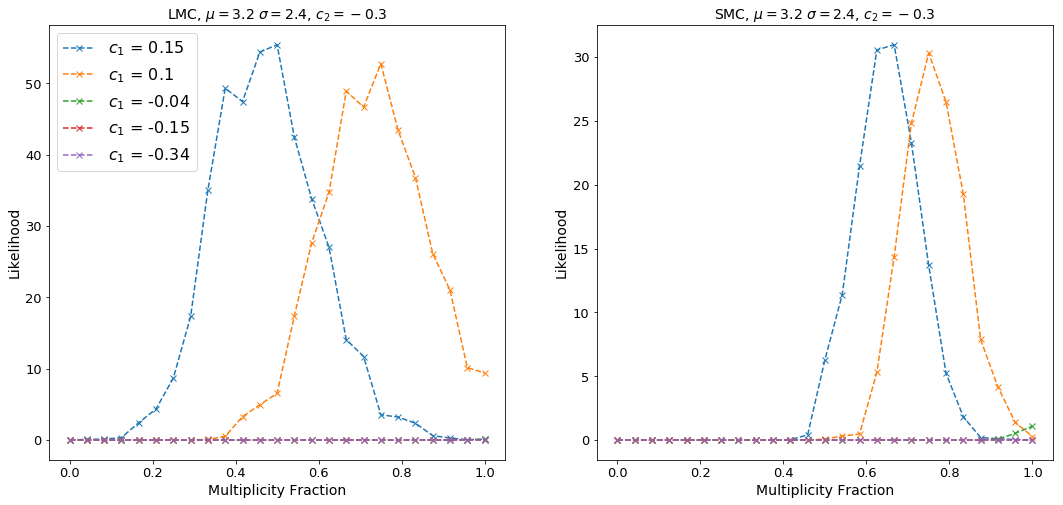

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (18,8))
matplotlib.rc('xtick', labelsize=13)
matplotlib.rc('ytick', labelsize=13)
for n in range(len(clist)):
    ax[0].plot(np.linspace(0,1,25),np.exp(answer_lmc[n]), 'x--', label = '$c_1$ = {}'.format(clist[n]))
for n in range(len(clist)):
    ax[1].plot(np.linspace(0,1,25),np.exp(answer_smc[n]), 'x--', label = '$c_1$ = {}'.format(clist[n]))

ax[0].legend(prop = {'size': 16})
ax[0].set_title('LMC, $\mu = 3.2$ $\sigma = 2.4$, $c_2 = -0.3$', size = 14)
ax[0].set_xlabel("Multiplicity Fraction", size = 14)
ax[0].set_ylabel("Likelihood", size = 14)

ax[1].set_title('SMC, $\mu = 3.2$ $\sigma = 2.4$, $c_2 = -0.3$', size = 14)
ax[1].set_xlabel("Multiplicity Fraction", size = 14)
ax[1].set_ylabel("Likelihood", size = 14)

# fig.suptitle("Likelihood for LMC and SMC r12-beta", size = 16, y = 0.95)
# fig.savefig('r12-beta-binary-fraction-both-new-jitter.pdf')
plt.show()

In [10]:
from multiprocessing import Pool
import functools

clist = [0.15, 0.1, -0.04, -0.15, -0.34]
pool = Pool()
answer_lmc2 = pool.map(functools.partial(bayli.likelihood_result,
                                        gal_path="/home/cody/Binary Search/R12 Run/lmc-r12-l33beta.pck",
                                        c2=-0.23,
                                        mu=3.4,
                                        sigma=2.4,
                                        m_min=100*u.jupiterMass),
                      clist)

Done with, 0 2019-06-29 08:25:11.230729
Done with, 0 2019-06-29 08:25:12.280638
Done with, 0 2019-06-29 08:25:12.299001
Done with, 0 2019-06-29 08:25:14.928927
Done with, 1 2019-06-29 08:31:04.411896
Done with, 1 2019-06-29 08:31:12.624261
Done with, 1 2019-06-29 08:31:12.664179
Done with, 1 2019-06-29 08:31:14.262137
Done with, 2 2019-06-29 08:35:03.226530
Done with, 2 2019-06-29 08:35:06.254093
Done with, 2 2019-06-29 08:35:12.300046
Done with, 2 2019-06-29 08:35:12.778490
Done with, 3 2019-06-29 08:38:55.549763
Done with, 3 2019-06-29 08:39:03.714298
Done with, 3 2019-06-29 08:39:05.494964
Done with, 3 2019-06-29 08:39:13.976249
Done with, 4 2019-06-29 08:43:25.524052
Done with, 4 2019-06-29 08:43:28.106553
Done with, 4 2019-06-29 08:43:28.349197
Done with, 4 2019-06-29 08:43:45.398534
Done with, 5 2019-06-29 08:48:21.727459
Done with, 5 2019-06-29 08:48:21.743810
Done with, 5 2019-06-29 08:48:29.303303
Done with, 5 2019-06-29 08:48:53.894529
Done with, 6 2019-06-29 08:56:28.727583


In [11]:
pool = Pool()
answer_smc2 = pool.map(functools.partial(bayli.likelihood_result,
                                        gal_path="/home/cody/Binary Search/R12 Run/smc-r12-l33beta.pck",
                                        c2=-0.23,
                                        mu=3.4,
                                        sigma=2.4,
                                        m_min=100*u.jupiterMass),
                      clist)

Done with, 0 2019-06-29 13:51:00.706976
Done with, 0 2019-06-29 13:51:00.952422
Done with, 0 2019-06-29 13:51:00.985473
Done with, 0 2019-06-29 13:51:01.249888
Done with, 1 2019-06-29 13:52:49.857936
Done with, 1 2019-06-29 13:52:50.056150
Done with, 1 2019-06-29 13:52:50.361824
Done with, 1 2019-06-29 13:52:50.679819
Done with, 2 2019-06-29 13:54:56.337037
Done with, 2 2019-06-29 13:54:56.457492
Done with, 2 2019-06-29 13:54:56.650687
Done with, 2 2019-06-29 13:54:57.395807
Done with, 3 2019-06-29 13:57:22.333591
Done with, 3 2019-06-29 13:57:23.766207
Done with, 3 2019-06-29 13:57:23.865029
Done with, 3 2019-06-29 13:57:24.403123
Done with, 4 2019-06-29 14:00:08.445756
Done with, 4 2019-06-29 14:00:08.787942
Done with, 4 2019-06-29 14:00:09.691337
Done with, 4 2019-06-29 14:00:10.699203
Done with, 5 2019-06-29 14:03:11.963612
Done with, 5 2019-06-29 14:03:13.592591
Done with, 5 2019-06-29 14:03:13.645992
Done with, 5 2019-06-29 14:03:14.912944
Done with, 6 2019-06-29 14:06:33.989185


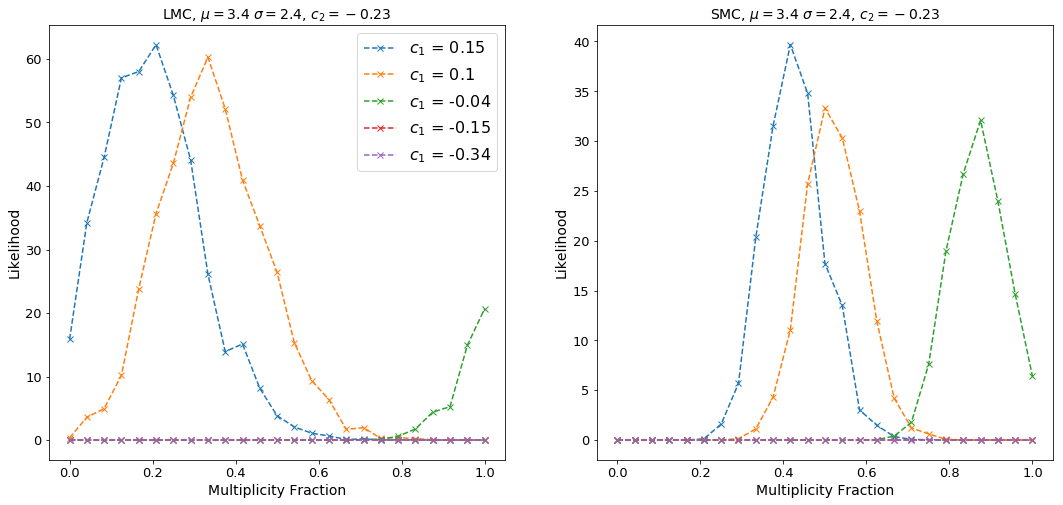

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (18,8))
matplotlib.rc('xtick', labelsize=13)
matplotlib.rc('ytick', labelsize=13)
for n in range(len(clist)):
    ax[0].plot(np.linspace(0,1,25),np.exp(answer_lmc2[n]), 'x--', label = '$c_1$ = {}'.format(clist[n]))
for n in range(len(clist)):
    ax[1].plot(np.linspace(0,1,25),np.exp(answer_smc2[n]), 'x--', label = '$c_1$ = {}'.format(clist[n]))

ax[0].legend(prop = {'size': 16})
ax[0].set_title('LMC, $\mu = 3.4$ $\sigma = 2.4$, $c_2 = -0.23$', size = 14)
ax[0].set_xlabel("Multiplicity Fraction", size = 14)
ax[0].set_ylabel("Likelihood", size = 14)

ax[1].set_title('SMC, $\mu = 3.4$ $\sigma = 2.4$, $c_2 = -0.23$', size = 14)
ax[1].set_xlabel("Multiplicity Fraction", size = 14)
ax[1].set_ylabel("Likelihood", size = 14)

# fig.suptitle("Likelihood for LMC and SMC r12-beta", size = 16, y = 0.95)
# fig.savefig('r12-beta-binary-fraction-both-new-jitter.pdf')
plt.show()

In [18]:
lmc_fe, smc_fe = same_dat(lmc, smc,
                          temp_lim=400, 
                          logg_lim=0.3,
                          feh_lim=0.05)

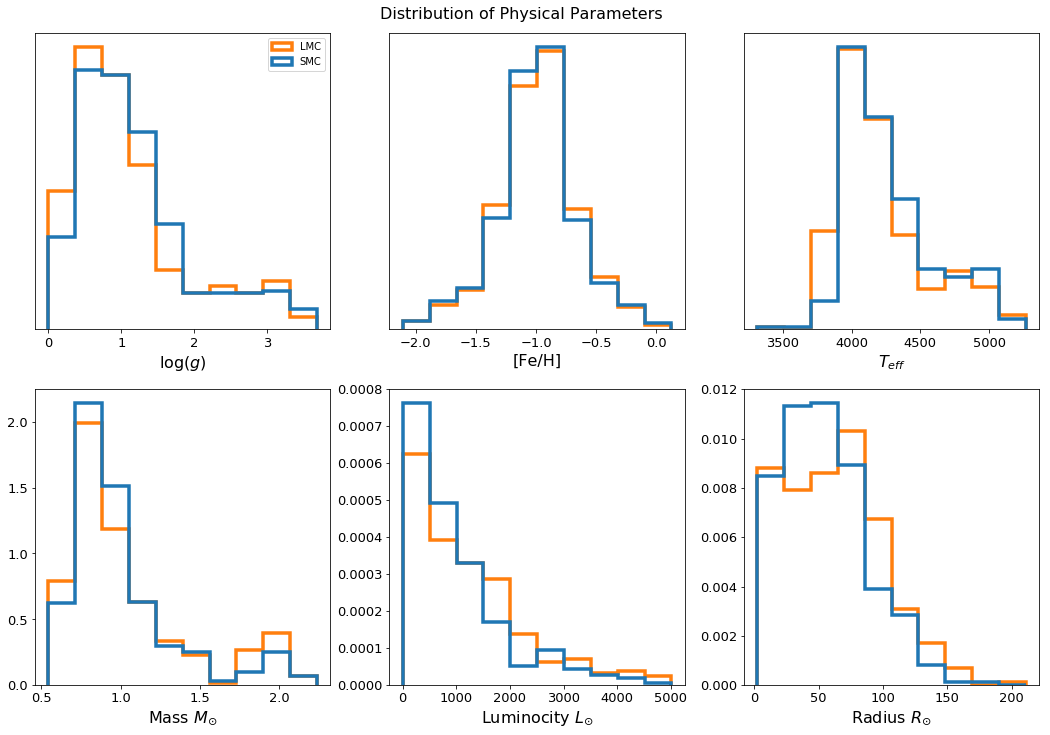

In [34]:
fig, ax = plt.subplots(2, 3, figsize = (18,12))
matplotlib.rc('xtick', labelsize=13)
matplotlib.rc('ytick', labelsize=13)

ax[0][0].hist([smc_fe['LOGG'], lmc_fe['LOGG']],
           histtype='step',
           density= True,
           linewidth = 3.5,
           label = ["SMC", "LMC"])
ax[0][1].hist([smc_fe['FE_H'], lmc_fe['FE_H']],
           histtype='step',
           density= True,
           linewidth = 3.5)
ax[0][2].hist([smc_fe['TEFF'], lmc_fe['TEFF']],
           histtype='step',
           density= True,
           linewidth = 3.5)

ax[1][0].hist([smc_fe['ISO_MASS'], lmc_fe['ISO_MASS']],
           histtype='step',
           density= True,
           linewidth = 3.5,
           label = ["SMC", "LMC"])
ax[1][1].hist([smc_fe['ISO_LUM'], lmc_fe['ISO_LUM']],
           histtype='step',
           density= True,
           linewidth = 3.5)
ax[1][2].hist([smc_fe['ISO_RAD'], lmc_fe['ISO_RAD']],
           histtype='step',
           density= True,
           linewidth = 3.5)

ax[0][0].legend()

ax[0][0].set_xlabel("$\log(g)$", size = 16)
ax[0][1].set_xlabel("[Fe/H]", size = 16)
ax[0][2].set_xlabel("$T_{eff}$", size = 16)

ax[1][0].set_xlabel("Mass $M_{\odot}$", size = 16)
ax[1][1].set_xlabel("Luminocity $L_{\odot}$", size = 16)
ax[1][2].set_xlabel("Radius $R_{\odot}$", size = 16)

ax[0][0].set_yticks([])
ax[0][1].set_yticks([])
ax[0][2].set_yticks([])


fig.suptitle("Distribution of Physical Parameters", size = 16, y = 0.91)
fig.savefig('r12-beta-properties-hist-same-Fe-1.pdf')
plt.show()

In [20]:
len(lmc_fe), len(smc_fe)

(419, 419)

In [24]:
outfile = "lmc-same-Fe-r12-l33beta.pck"
if os.path.exists(outfile): os.remove(outfile)
rick.dump(lmc_fe, open(outfile, 'wb'))

outfile = "smc-same-Fe-r12-l33beta.pck"
if os.path.exists(outfile): os.remove(outfile)
rick.dump(smc_fe, open(outfile, 'wb'))

In [29]:
pool = Pool()
answer_lmc_same_Fe = pool.map(functools.partial(lnlh, path="/home/cody/Binary Search/R12 Run/lmc-same-Fe-r12-l33beta.pck"), aa)

Done with, 0
Done with, 0
Done with, 0
Done with, 0
Done with, 0
Done with, 1
Done with, 1
Done with, 1
Done with, 1
Done with, 1
Done with, 2
Done with, 2
Done with, 2
Done with, 2
Done with, 2
Done with, 3
Done with, 3
Done with, 3
Done with, 3
Done with, 3
Done with, 4
Done with, 4
Done with, 4
Done with, 4
Done with, 5
Done with, 5
Done with, 4
Done with, 5
Done with, 5
Done with, 5
Done with, 6
Done with, 6
Done with, 6
Done with, 6
Done with, 7
Done with, 6
Done with, 7
Done with, 7
Done with, 7
Done with, 8
Done with, 8
Done with, 7
Done with, 8
Done with, 8
Done with, 9
Done with, 9
Done with, 8
Done with, 9
Done with, 10
Done with, 9
Done with, 10
Done with, 9
Done with, 10
Done with, 11
Done with, 11
Done with, 10
Done with, 10
Done with, 11
Done with, 11
Done with, 12
Done with, 12
Done with, 12
Done with, 12
Done with, 11
Done with, 13
Done with, 13
Done with, 13
Done with, 13
Done with, 14
Done with, 14
Done with, 12
Done with, 14
Done with, 15
Done with, 14
Done with, 15


In [30]:
pool = Pool()
answer_smc_same_Fe = pool.map(functools.partial(lnlh, path="/home/cody/Binary Search/R12 Run/smc-same-Fe-r12-l33beta.pck"), aa)

Done with, 0
Done with, 0
Done with, 0
Done with, 0
Done with, 0
Done with, 1
Done with, 1
Done with, 1
Done with, 1
Done with, 1
Done with, 2
Done with, 2
Done with, 2
Done with, 2
Done with, 2
Done with, 3
Done with, 3
Done with, 3
Done with, 3
Done with, 3
Done with, 4
Done with, 4
Done with, 4
Done with, 4
Done with, 4
Done with, 5
Done with, 5
Done with, 5
Done with, 5
Done with, 5
Done with, 6
Done with, 6
Done with, 6
Done with, 6
Done with, 6
Done with, 7
Done with, 7
Done with, 7
Done with, 7
Done with, 7
Done with, 8
Done with, 8
Done with, 8
Done with, 8
Done with, 8
Done with, 9
Done with, 9
Done with, 9
Done with, 9
Done with, 9
Done with, 10
Done with, 10
Done with, 10
Done with, 10
Done with, 10
Done with, 11
Done with, 11
Done with, 11
Done with, 11
Done with, 11
Done with, 12
Done with, 12
Done with, 12
Done with, 12
Done with, 12
Done with, 13
Done with, 13
Done with, 13
Done with, 13
Done with, 14
Done with, 13
Done with, 14
Done with, 14
Done with, 14
Done with, 15


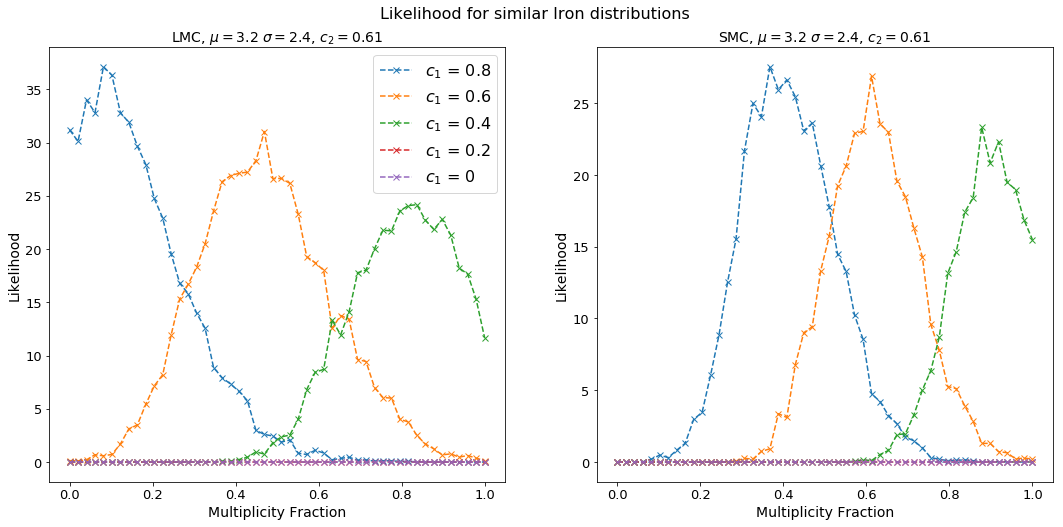

In [48]:
fig, ax = plt.subplots(1, 2, figsize = (18,8))
matplotlib.rc('xtick', labelsize=13)
matplotlib.rc('ytick', labelsize=13)
for n in range(len(aa)):
    ax[0].plot(np.linspace(0,1,50),np.exp(answer_lmc_same_Fe[n]), 'x--', label = '$c_1$ = {}'.format(aa[n]))

for n in range(len(aa)):
    ax[1].plot(np.linspace(0,1,50),np.exp(answer_smc_same_Fe[n]), 'x--', label = '$c_1$ = {}'.format(aa[n]))

ax[0].legend(prop = {'size': 16})
ax[0].set_title('LMC, $\mu = 3.2$ $\sigma = 2.4$, $c_2 = 0.61$', size = 14)
ax[0].set_xlabel("Multiplicity Fraction", size = 14)
ax[0].set_ylabel("Likelihood", size = 14)

ax[1].set_title('SMC, $\mu = 3.2$ $\sigma = 2.4$, $c_2 = 0.61$', size = 14)
ax[1].set_xlabel("Multiplicity Fraction", size = 14)
ax[1].set_ylabel("Likelihood", size = 14)

fig.suptitle("Likelihood for similar Iron distributions", size = 16, y = 0.95)
fig.savefig('binary-fraction-both-same-Fe-1.pdf')
plt.show()

In [65]:
outfile = "r12-beta-results.pck"
if os.path.exists(outfile): os.remove(outfile)
rick.dump((answer_lmc,
           answer_smc,
           answer_lmc_same_Fe,
           answer_smc_same_Fe),
          open("r12-beta-results.pck", "wb"))

In [4]:
f = open("r12-beta-results.pck", "rb")
answer_lmc, answer_smc, answer_lmc_same_Fe, answer_smc_same_Fe  = rick.load(f)
f.close()

In [57]:
lmc

RADIALV,RADIAL_ERR,RADIAL_DATE,APOGEE_ID,FIELD,NVISITS,SNR,VHELIO_AVG,VERR,VSCATTER,TEFF,TEFF_ERR,LOGG,LOGG_ERR,FE_H,FE_H_ERR,RV_TEFF,RV_LOGG,RV_FEH,MY_NVISITS,ISO_MASS,ISO_LUM,ISO_RAD,ISO_FIT_DIST
,,,,,,,,,,,,,,,,,,,,solMass,solLum,solRad,
object,object,object,str18,str16,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float64,float64,float64,float64
[232.71423 233.0006 232.82678 233.48077 232.71996 232.63113],[0.1 0.1 0.1 0.1 0.11681755 0.1 ],[2458029.78298 2458032.75775 2458055.66794 2458094.59393 2458115.52039 2458119.52177],2M04015195-6826505,LMC2,6,58.9679,232.916,0.0310103,0.313648,4071.8918,99.28176,1.0163207,0.05855874,-0.83068633,0.020461017,4000.0,0.5,-1.0,6,1.2860000133514404,872.9713377165597,59.369170018001064,0.008306249044835567
[233.55309 233.6064 233.2084 234.68584 234.1073 ],[0.11020647 0.1 0.11116894 0.11285975 0.17548165],[2458029.78298 2458032.75775 2458055.66794 2458094.59393 2458119.52177],2M04024888-6843110,LMC2,5,63.4098,233.813,0.0515061,0.574975,4270.234,112.086426,1.0638863,0.074231416,-1.5016663,0.026390817,4250.0,1.0,-1.5,5,0.8080000281333923,654.6361510668559,46.746610697553734,0.025965509936213493
[217.65451 217.23831 217.68497 217.61157 217.85457 218.2279 ],[0.1 0.1 0.1 0.1 0.1 0.1],[2458029.78298 2458032.75775 2458055.66794 2458094.59393 2458115.52039 2458119.52177],2M04032565-6817363,LMC2,6,79.4209,217.646,0.020081,0.324033,3995.033,93.26685,0.56347823,0.05976843,-0.92044634,0.020464242,4000.0,0.5,-1.0,6,0.7490000128746033,1336.5952934825214,76.31548867293843,0.00660866592079401
[235.44357 234.98477 235.24593 235.1173 235.12958 235.19133],[0.10095171 0.1 0.1 0.11067865 0.13009778 0.18237337],[2458029.78298 2458032.75775 2458055.66794 2458094.59393 2458115.52039 2458119.52177],2M04034063-6836500,LMC2,6,69.2486,235.188,0.0443018,0.153856,4529.7593,113.992386,1.7593024,0.07010071,-1.0839664,0.019387119,4750.0,2.0,-1.0,6,0.8479999899864197,162.9295631926434,20.72541161721913,0.015274290926754475
[223.05186 223.37538 223.27936 222.60027 223.37643 223.17177],[0.16142584 0.14929938 0.14077568 0.14304219 0.28915536 0.17982076],[2458029.78298 2458032.75775 2458055.66794 2458094.59393 2458115.52039 2458119.52177],2M04034857-6848236,LMC2,6,71.1541,223.129,0.0683645,0.293523,4391.4766,115.4173,0.82408303,0.07991151,-1.6804663,0.026351817,4250.0,1.0,-2.0,6,1.0889999866485596,1496.2354918140318,66.82397130288582,0.01853283680975437
[12.880848 14.188863 13.327595 14.344133 15.304016 13.721668],[0.18094602 0.1602276 0.17158851 0.15511441 0.2544003 0.19515142],[2458029.78298 2458032.75775 2458055.66794 2458094.59393 2458115.52039 2458119.52177],2M04035208-6845265,LMC2,6,62.7329,13.8712,0.0734632,0.851776,5218.178,143.40222,2.336067,0.07350679,-0.96969634,0.022839969,5000.0,2.0,-1.0,6,0.8180000185966492,68.07692719888216,10.095216058669676,0.009182813577353954
[268.88968 268.59064 268.9257 267.9359 267.2131 267.6868 ],[0.1 0.1 0.1 0.10385335 0.14460318 0.27098715],[2458029.78298 2458032.75775 2458055.66794 2458094.59393 2458115.52039 2458119.52177],2M04035891-6814582,LMC2,6,87.5962,268.376,0.0440167,0.701665,4207.493,106.560524,0.54597986,0.07942656,-1.7394663,0.027628558,4250.0,1.0,-1.5,6,1.0509999990463257,2301.441756763227,90.28312903256264,0.040509581565856934
[29.900446 29.865595 29.89624 29.790257 29.979445 29.49685 ],[0.1 0.1 0.13087143 0.1 0.12453397 0.12437127],[2458029.78298 2458032.75775 2458055.66794 2458094.59393 2458115.52039 2458119.52177],2M04040420-6857223,LMC2,6,63.3635,29.8235,0.0407876,0.170343,4946.7456,122.53274,3.040858,0.06318618,-0.32969633,0.0145530915,4750.0,3.0,-0.5,6,1.2669999599456787,16.63412482345293,5.552828516992805,0.005923205520957708


NameError: name 'linfit' is not defined

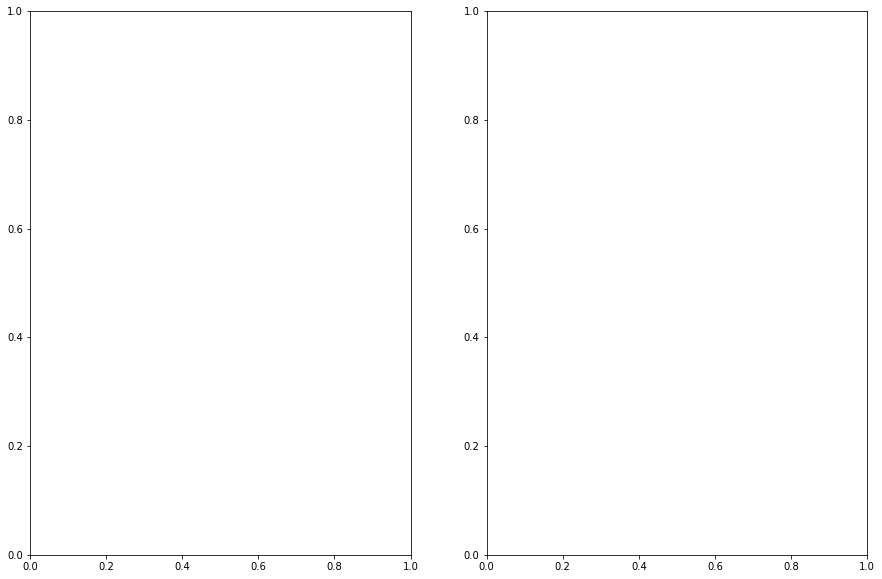

In [5]:
from scipy import stats
fig,ax  = plt.subplots(1,2, figsize = (15,10))
logg = np.linspace(min(lmc['LOGG']), max(lmc['LOGG']), 1000)



ax[0].errorbar(lmc['LOGG'], lmc['VSCATTER'], yerr = lmc['VERR'], fmt = '.', c = 'C0')
ax[0].plot(logg, a + b*logg, '--', c = 'C4', linewidth = 3, label = '"Best" fit, $\chi^2$ = {}'.format(chi2))

ax[0].plot(logg, 10**(-0.04-0.6*logg), '--', c='C3', linewidth = 3, label = '$c_1 = -0.04$')
ax[0].plot(logg, 10**(-0.34-0.6*logg), '--', c='C1', linewidth = 3, label = '$c_1 = -0.34$')
ax[0].plot(logg, 10**(0.26-0.6*logg), '--', c='C2', linewidth = 3, label = '$c_1 = +0.26$')
ax[0].plot(logg, 10**(-0.2335502 - 0.027*logg),  '--', c='C8', linewidth = 3, label = '$c_1 = -0.23$')

ax[0].legend(prop = {'size': 12}, loc = 1)
ax[0].set_ylabel('VSCATTER $(km/s)$', size = 18)
ax[0].set_xlabel('logg', size = 18)
ax[0].set_yscale('log')

a, da, b, db, chi2 = linfit(smc['LOGG'], smc['VSCATTER'], smc['VERR'])

ax[1].errorbar(smc['LOGG'], smc['VSCATTER'], yerr = smc['VERR'], fmt = '.', c = 'C0')
ax[1].plot(logg, a + b*logg, '--', c = 'C4', linewidth = 3, label = '"Best" fit, $\chi^2$ = {}'.format(chi2))

ax[1].plot(logg, 10**(-0.04-0.6*logg), '--', c='C3', linewidth = 3, label = '$c_1 = -0.04$')
ax[1].plot(logg, 10**(-0.34-0.6*logg), '--', c='C1', linewidth = 3, label = '$c_1 = -0.34$')
ax[1].plot(logg, 10**(0.26-0.6*logg), '--', c='C2', linewidth = 3, label = '$c_1 = +0.26$')
ax[1].legend(prop = {'size': 12}, loc = 1)
ax[1].set_ylabel('VSCATTER $(km/s)$', size = 18)
ax[1].set_xlabel('logg', size = 18)
ax[1].set_yscale('log')

fig.savefig("jitter-plot.pdf")

In [9]:
all_logg = np.append(lmc["LOGG"], smc['LOGG'])
all_scatter = np.append(lmc['VSCATTER'], smc['VSCATTER'])
all_err = np.append(lmc['VERR'], smc['VERR'])

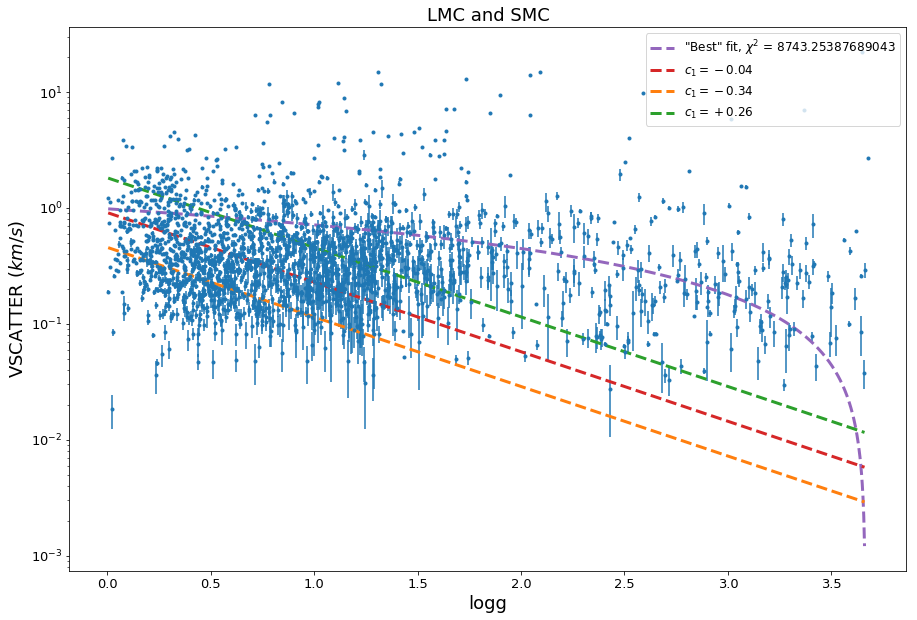

In [138]:
fig = plt.figure(figsize = (15,10))
logg = np.linspace(min(lmc['LOGG']), max(lmc['LOGG']), 1000)

a, da, b, db, chi2 = linfit(all_logg, all_scatter, all_err)

plt.errorbar(all_logg, all_scatter, all_err, fmt = '.', c = 'C0')
plt.plot(logg, a + b*logg, '--', c = 'C4', linewidth = 3, label = '"Best" fit, $\chi^2$ = {}'.format(chi2))

plt.plot(logg, 10**(-0.04-0.6*logg), '--', c='C3', linewidth = 3, label = '$c_1 = -0.04$')
plt.plot(logg, 10**(-0.34-0.6*logg), '--', c='C1', linewidth = 3, label = '$c_1 = -0.34$')
plt.plot(logg, 10**(0.26-0.6*logg), '--', c='C2', linewidth = 3, label = '$c_1 = +0.26$')
# plt.plot(logg, 10**(-0.03-0.1*logg), '--', c='C8', linewidth = 3, label = '$c_1 = +0.26$')
plt.legend(prop = {'size': 12}, loc = 1)
plt.ylabel('VSCATTER $(km/s)$', size = 18)
plt.xlabel('logg', size = 18)
plt.yscale('log')
plt.title('LMC and SMC', size = 18)
fig.savefig('all-scatter.pdf')

In [143]:
import scipy
scipy.optimize.curve_fit(lambda g,c1,c2: 10**(c1 + c2*g),  lmc['LOGG'],  lmc['VSCATTER'],
                         p0=(-0.02, +0.6), sigma = lmc['VERR'])

(array([-0.01519862, -0.04350128]), array([[ 0.00045547, -0.00051766],
        [-0.00051766,  0.00104047]]))

(array([786.,  36.,  18.,   6.,   7.,   3.,   1.,   3.,   1.,   2.]),
 array([  29.1303 ,  166.14127,  303.15225,  440.1632 ,  577.1742 ,
         714.1851 ,  851.1961 ,  988.2071 , 1125.218  , 1262.229  ,
        1399.24   ], dtype=float32),
 <a list of 10 Patch objects>)

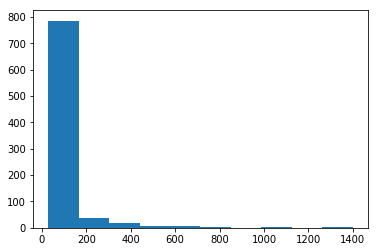

In [99]:
plt.hist(smc['SNR'])

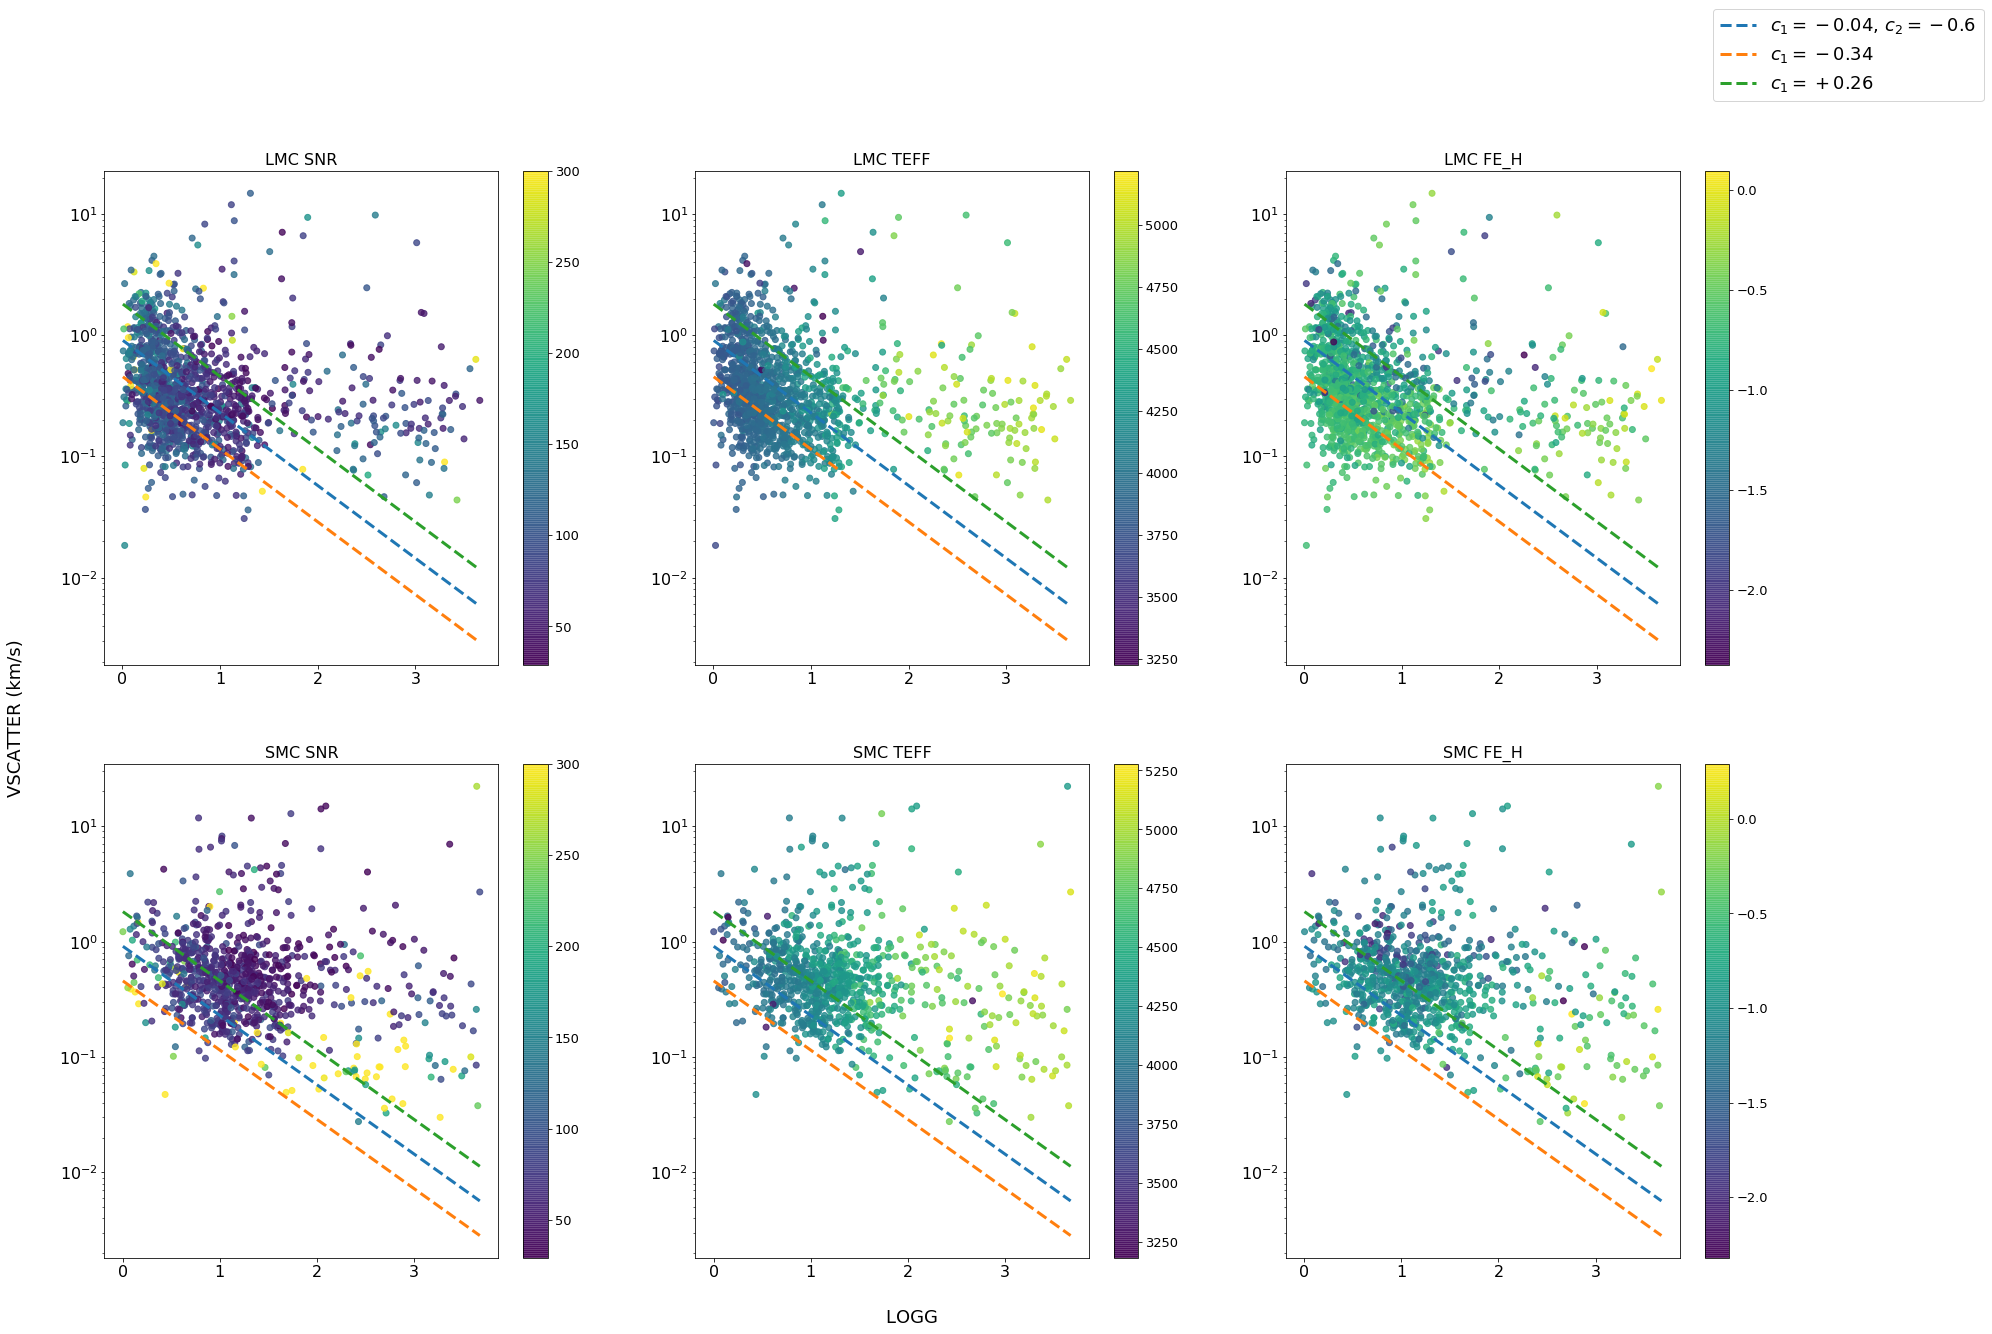

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(30, 20))
# fig.tight_layout()
# fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)
prop = [lmc['SNR'], lmc['TEFF'], lmc["FE_H"], smc['SNR'], smc['TEFF'], smc["FE_H"]]
name = ["LMC SNR", "LMC TEFF", "LMC FE_H","SMC SNR", "SMC TEFF", "SMC FE_H",]
for p, ax, n in zip(prop, ax.ravel(), name):
    
    if len(p) > 1000:
        if n == 'LMC SNR':
            im = ax.scatter(lmc['LOGG'], lmc['VSCATTER'],  c = p, cmap = 'viridis', vmax = 300,alpha = 0.8)
        else:
            im = ax.scatter(lmc['LOGG'], lmc['VSCATTER'],  c = p, cmap = 'viridis',alpha = 0.8)

        fig.colorbar(im, ax=ax)
        logg = np.linspace(min(lmc['LOGG']), max(lmc['LOGG']), 1000)

        ax.plot(logg, 10**(-0.04-0.6*logg), '--', c='C0', linewidth = 3,)
        ax.plot(logg, 10**(-0.34-0.6*logg), '--', c='C1', linewidth = 3,)
        ax.plot(logg, 10**(0.26-0.6*logg), '--', c='C2', linewidth = 3, label = '$c_1 = +0.26$')


        ax.set_title(n, size = 16)
        ax.set_yscale('log')
        ax.tick_params(axis='both', labelsize=16)
    else:
        if n == 'SMC SNR':
            im = ax.scatter(smc['LOGG'], smc['VSCATTER'],  c = p, cmap = 'viridis', vmax = 300, alpha = 0.8)
        else:
            im = ax.scatter(smc['LOGG'], smc['VSCATTER'],  c = p, cmap = 'viridis', alpha = 0.8)

        fig.colorbar(im, ax=ax)
        logg = np.linspace(min(smc['LOGG']), max(smc['LOGG']), 1000)

        ax.plot(logg, 10**(-0.04-0.6*logg), '--', c='C0', linewidth = 3,)
        ax.plot(logg, 10**(-0.34-0.6*logg), '--', c='C1', linewidth = 3,)
        ax.plot(logg, 10**(0.26-0.6*logg), '--', c='C2', linewidth = 3,)

        ax.set_title(n, size = 16)
        ax.set_yscale('log')
        ax.tick_params(axis='both', labelsize=16)

fig.text(0.5, 0.08, 'LOGG ', ha='center', size = 18)
fig.text(0.08, 0.5, 'VSCATTER (km/s)', va='center', rotation='vertical', size = 18)
    
fig.legend(('$c_1 = -0.04$, $c_2 = -0.6$',
            '$c_1 = -0.34$',
            '$c_1 = +0.26$',), prop = {'size':18})
fig.savefig('all-jitter-c2-6.pdf')

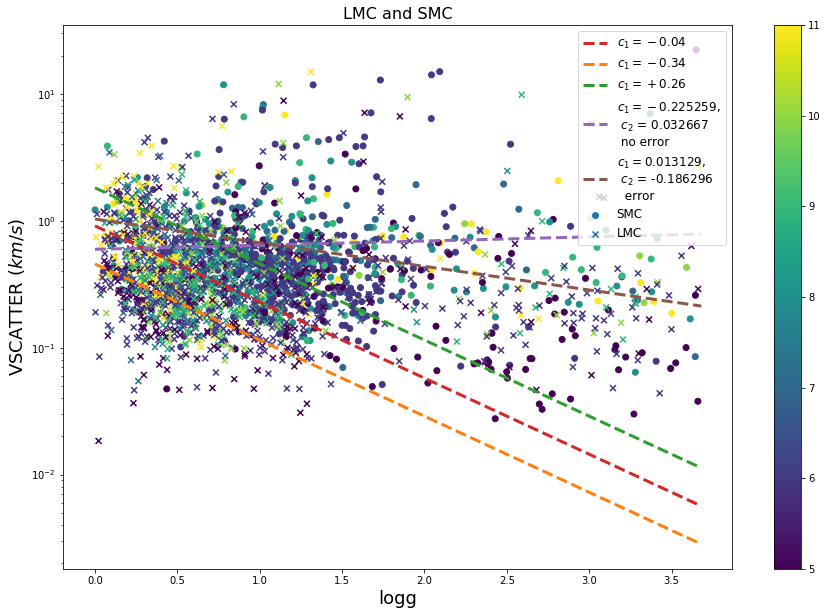

In [142]:
fig = plt.figure(figsize = (15,10))
logg = np.linspace(min(all_logg), max(all_logg), 100)


plt.scatter(smc['LOGG'], smc['VSCATTER'],
            c = smc['MY_NVISITS'],
            marker = 'o',
            cmap = 'viridis',
            label = "SMC")
plt.scatter(lmc['LOGG'], lmc['VSCATTER'],
            c = lmc['MY_NVISITS'],
            marker = 'x',
            cmap = 'viridis',
            label = "LMC", 
            vmax = max(smc['MY_NVISITS']))
plt.colorbar()
plt.plot(logg, 10**(-0.04-0.6*logg), '--', c='C3', linewidth = 3, label = '$c_1 = -0.04$')
plt.plot(logg, 10**(-0.34-0.6*logg), '--', c='C1', linewidth = 3, label = '$c_1 = -0.34$')
plt.plot(logg, 10**(0.26-0.6*logg), '--', c='C2', linewidth = 3, label = '$c_1 = +0.26$')
plt.plot(logg, 10**(0.26-0.6*logg), '--', c='C2', linewidth = 3, label = '$c_1 = +0.26$')

foo, bar = scipy.optimize.curve_fit(lambda g,c1,c2: 10**(c1 + c2*g),  all_logg,  all_scatter,
                         p0=(-0.02, -0.8))

plt.plot(logg, 10**(foo[0] + foo[1]*logg),  '--',
         c='C4', linewidth = 3, label = '$c_1 = {:1f}$, \n $c_2$ = {:1f} \n no error'.format(foo[0], foo[1]))

foo, bar = scipy.optimize.curve_fit(lambda g,c1,c2: 10**(c1 + c2*g),  all_logg,  all_scatter,
                         p0=(-0.02, -0.6),sigma = all_err)

plt.plot(logg, 10**(foo[0] + foo[1]*logg),  '--',
         c='C5', linewidth = 3, label = '$c_1 = {:1f}$, \n $c_2$ = {:1f} \n  error'.format(foo[0], foo[1]))

plt.legend(prop = {'size': 12}, loc = 1)
plt.ylabel('VSCATTER $(km/s)$', size = 18)
plt.xlabel('logg', size = 18)
plt.yscale('log')
plt.title("LMC and SMC", size = 16)
plt.savefig('all-jitter.pdf')

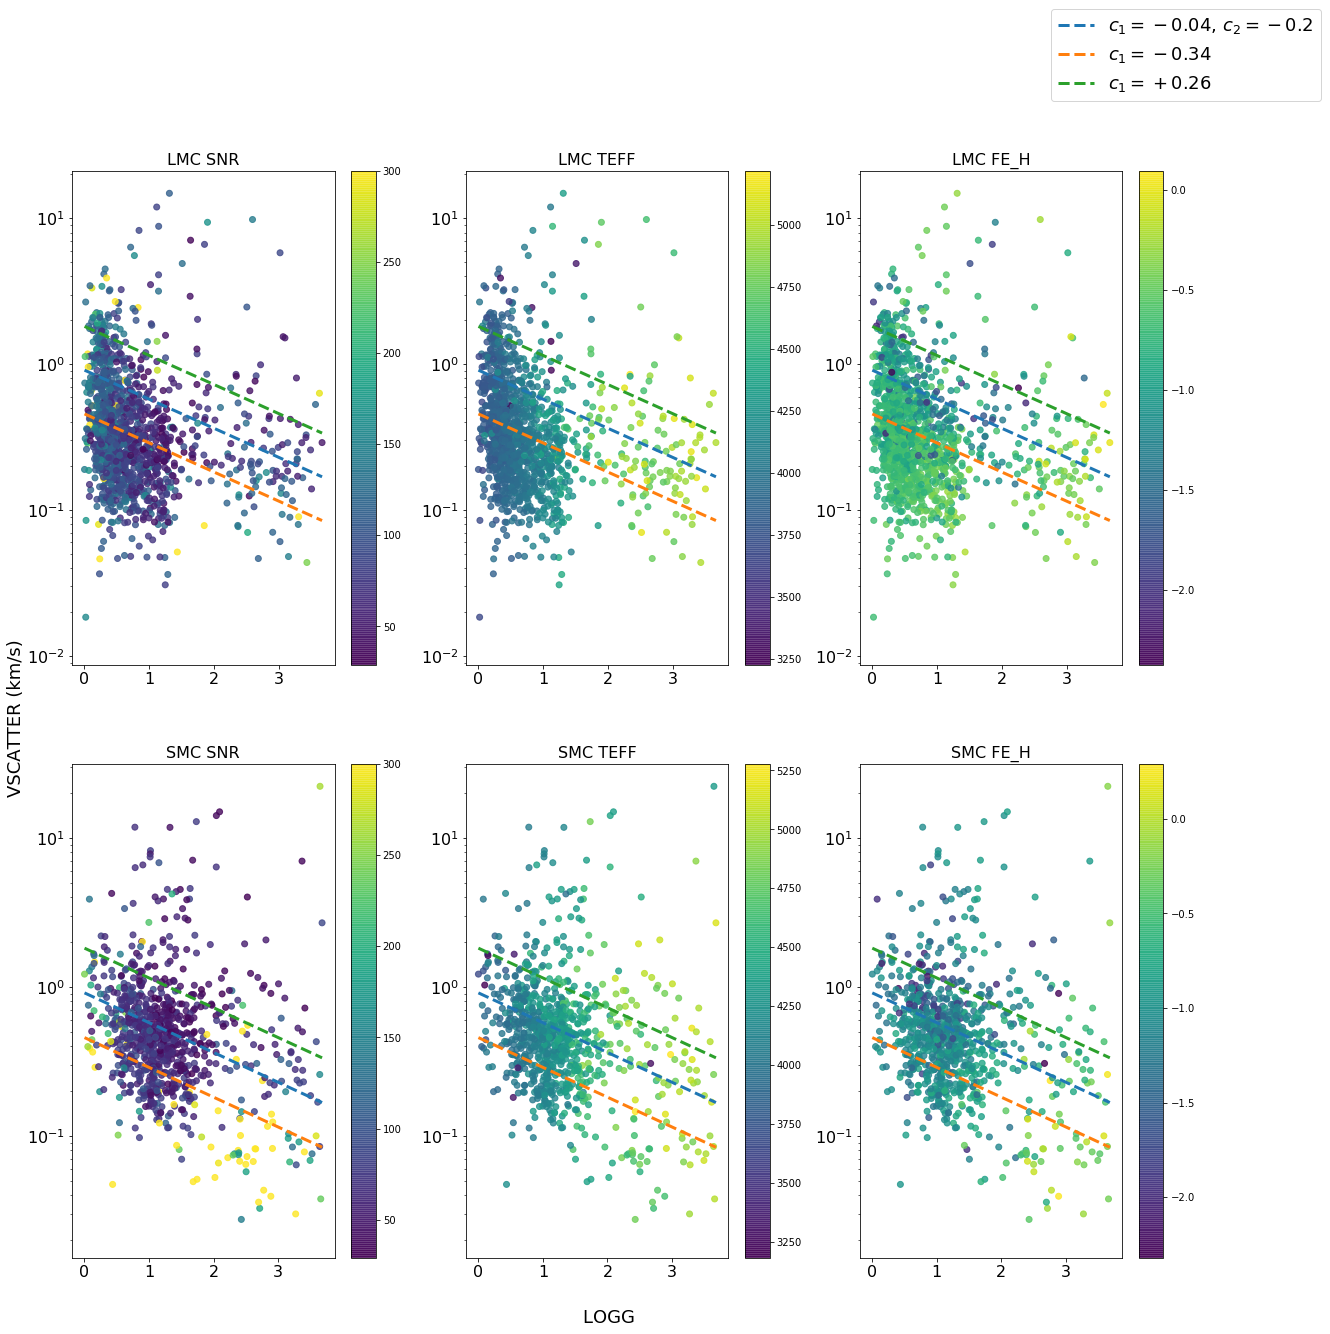

In [29]:
fig, ax = plt.subplots(2, 3, figsize=(20, 20))
# fig.tight_layout()
# fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)
prop = [lmc['SNR'], lmc['TEFF'], lmc["FE_H"], smc['SNR'], smc['TEFF'], smc["FE_H"]]
name = ["LMC SNR", "LMC TEFF", "LMC FE_H","SMC SNR", "SMC TEFF", "SMC FE_H",]
for p, ax, n in zip(prop, ax.ravel(), name):
    
    if len(p) > 1000:
        if n == 'LMC SNR':
            im = ax.scatter(lmc['LOGG'], lmc['VSCATTER'],  c = p, cmap = 'viridis', vmax = 300,alpha = 0.8)
        else:
            im = ax.scatter(lmc['LOGG'], lmc['VSCATTER'],  c = p, cmap = 'viridis',alpha = 0.8)

        fig.colorbar(im, ax=ax)
        logg = np.linspace(min(lmc['LOGG']), max(lmc['LOGG']), 1000)

        ax.plot(logg, 10**(-0.04-0.2*logg), '--', c='C0', linewidth = 3,)
        ax.plot(logg, 10**(-0.34-0.2*logg), '--', c='C1', linewidth = 3,)
        ax.plot(logg, 10**(0.26-0.2*logg), '--', c='C2', linewidth = 3, label = '$c_1 = +0.26$')


        ax.set_title(n, size = 16)
        ax.set_yscale('log')
        ax.tick_params(axis='both', labelsize=16)
    else:
        if n == 'SMC SNR':
            im = ax.scatter(smc['LOGG'], smc['VSCATTER'],  c = p, cmap = 'viridis', vmax = 300, alpha = 0.8)
        else:
            im = ax.scatter(smc['LOGG'], smc['VSCATTER'],  c = p, cmap = 'viridis', alpha = 0.8)

        fig.colorbar(im, ax=ax)
        logg = np.linspace(min(smc['LOGG']), max(smc['LOGG']), 1000)

        ax.plot(logg, 10**(-0.04-0.2*logg), '--', c='C0', linewidth = 3,)
        ax.plot(logg, 10**(-0.34-0.2*logg), '--', c='C1', linewidth = 3,)
        ax.plot(logg, 10**(0.26-0.2*logg), '--', c='C2', linewidth = 3,)

        ax.set_title(n, size = 16)
        ax.set_yscale('log')
        ax.tick_params(axis='both', labelsize=16)

fig.text(0.5, 0.08, 'LOGG ', ha='center', size = 18)
fig.text(0.08, 0.5, 'VSCATTER (km/s)', va='center', rotation='vertical', size = 18)
    
fig.legend(('$c_1 = -0.04$, $c_2 = -0.2$',
            '$c_1 = -0.34$',
            '$c_1 = +0.26$',), prop = {'size':18})
fig.savefig('all-jitter-c2-2.pdf')

(array([127., 334.,   0.,  86.,   0., 217.,  50.,   0.,   9.,  40.]),
 array([ 5. ,  5.6,  6.2,  6.8,  7.4,  8. ,  8.6,  9.2,  9.8, 10.4, 11. ]),
 <a list of 10 Patch objects>)

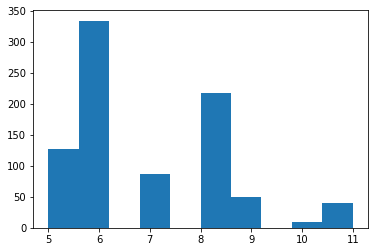

In [121]:
plt.hist(smc['MY_NVISITS'])

foo[0]

In [191]:
scipy.optimize.curve_fit(lambda g,c1,c2: 10**(c1 + c2*g),  smc['LOGG'],  smc['VSCATTER'],
                         p0=(-0.02, -0.6), sigma = smc['VERR'])

(array([-0.09565885, -0.22608228]), array([[ 0.00237789, -0.00137083],
        [-0.00137083,  0.00150997]]))

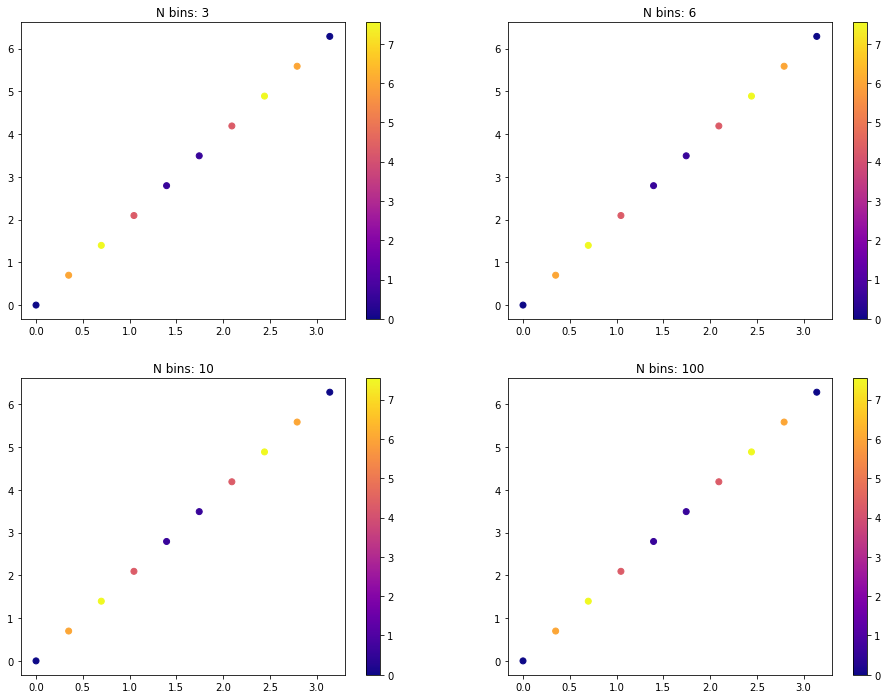

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

"""
Creating a colormap from a list of colors
-----------------------------------------
Creating a colormap from a list of colors can be done with the `from_list`
method of `LinearSegmentedColormap`. You must pass a list of RGB tuples that
define the mixture of colors from 0 to 1.


Creating custom colormaps
-------------------------
It is also possible to create a custom mapping for a colormap. This is
accomplished by creating dictionary that specifies how the RGB channels
change from one end of the cmap to the other.

Example: suppose you want red to increase from 0 to 1 over the bottom
half, green to do the same over the middle half, and blue over the top
half.  Then you would use:

cdict = {'red':   ((0.0,  0.0, 0.0),
                   (0.5,  1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'green': ((0.0,  0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'blue':  ((0.0,  0.0, 0.0),
                   (0.5,  0.0, 0.0),
                   (1.0,  1.0, 1.0))}

If, as in this example, there are no discontinuities in the r, g, and b
components, then it is quite simple: the second and third element of
each tuple, above, is the same--call it "y".  The first element ("x")
defines interpolation intervals over the full range of 0 to 1, and it
must span that whole range.  In other words, the values of x divide the
0-to-1 range into a set of segments, and y gives the end-point color
values for each segment.

Now consider the green. cdict['green'] is saying that for
0 <= x <= 0.25, y is zero; no green.
0.25 < x <= 0.75, y varies linearly from 0 to 1.
x > 0.75, y remains at 1, full green.

If there are discontinuities, then it is a little more complicated.
Label the 3 elements in each row in the cdict entry for a given color as
(x, y0, y1).  Then for values of x between x[i] and x[i+1] the color
value is interpolated between y1[i] and y0[i+1].

Going back to the cookbook example, look at cdict['red']; because y0 !=
y1, it is saying that for x from 0 to 0.5, red increases from 0 to 1,
but then it jumps down, so that for x from 0.5 to 1, red increases from
0.7 to 1.  Green ramps from 0 to 1 as x goes from 0 to 0.5, then jumps
back to 0, and ramps back to 1 as x goes from 0.5 to 1.

row i:   x  y0  y1
                /
               /
row i+1: x  y0  y1

Above is an attempt to show that for x in the range x[i] to x[i+1], the
interpolation is between y1[i] and y0[i+1].  So, y0[0] and y1[-1] are
never used.

"""
# Make some illustrative fake data:

x = np.linspace(0, np.pi, 10)
y = np.linspace(0, 2*np.pi, 10)

Z = np.cos(x) * np.sin(y) * 10

fig, ax = plt.subplots(2, 2, figsize=(16, 12))
# fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)
for n_bin, ax in zip(n_bins, ax.ravel()):
    # Create the colormap

    # Fewer bins will result in "coarser" colomap interpolation
    im = ax.scatter(x,y,c=Z, cmap='plasma')
    ax.set_title("N bins: %s" % n_bin)
    fig.colorbar(im, ax=ax)

plt.show()

AxesSubplot(0.125,0.536818;0.227941x0.343182)
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
AxesSubplot(0.672059,0.536818;0.227941x0.343182)
AxesSubplot(0.125,0.125;0.227941x0.343182)


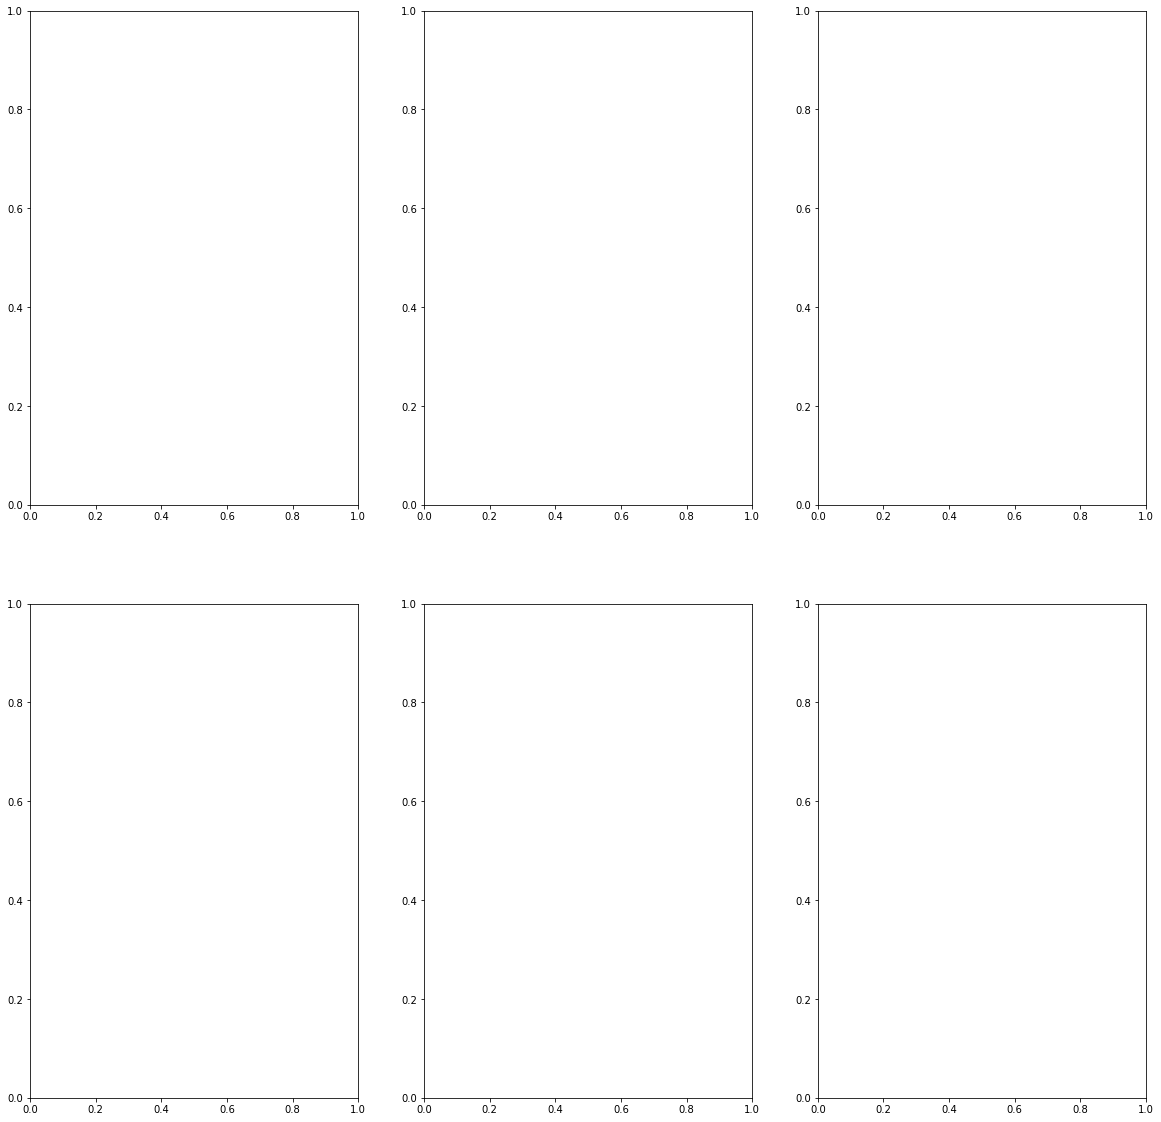

In [13]:
fig, ax = plt.subplots(2, 3, figsize=(20, 20))
# fig.tight_layout()
# fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)
prop = [smc['MY_NVISITS'], smc['TEFF'], smc["FE_H"], smc['SNR']]
name = ["NVISITS", "TEFF", "FE_H", "SNR"]
for p, ax, n in zip(prop, ax.ravel(), name):
    print( ax)

In [1]:
%run "/home/cody/Binary Search/pybay/bayli.py"
lmc = rick.load(open("/home/cody/Binary Search/R12 Run/lmc-r12-l33beta.pck", 'rb'))
smc = rick.load(open("/home/cody/Binary Search/R12 Run/smc-r12-l33beta.pck", 'rb'))

In [ ]:
mcmc_likelihood(gal=smc, ndim=3, nwalkers=6, threads=6, nsteps=1000,
                outfile="/home/cody/Binary Search/lmc-mcmc-n04-n2.pck",
                    c1=-0.04, c2=-0.6)

Done with binary fraction,  0.9920226718182121 2019-06-26 11:07:12.543067
Done with binary fraction,  0.20355416424396605 2019-06-26 11:07:12.554422
Done with binary fraction,  0.5203559389515136 2019-06-26 11:07:12.599933
Done with binary fraction,  0.18480099845510428 2019-06-26 11:07:12.791532
Done with binary fraction,  0.6464231816342583 2019-06-26 11:07:12.819530
Done with binary fraction,  0.5038767171262617 2019-06-26 11:07:12.930547
Done with binary fraction,  0.2247104894084152 2019-06-26 11:09:46.587274
Done with binary fraction,  0.5310968391628963 2019-06-26 11:09:46.681180
Done with binary fraction,  0.3785437621106268 2019-06-26 11:10:39.478046
Done with binary fraction,  0.5298855934715524 2019-06-26 11:10:39.509995
Done with binary fraction,  0.18749361805279866 2019-06-26 11:10:39.577056
Done with binary fraction,  0.15678176507273955 2019-06-26 11:11:55.354175
Done with binary fraction,  0.8397339207146715 2019-06-26 11:11:55.437985
Done with binary fraction,  0.7864

Done with binary fraction,  0.4597239622001737 2019-06-26 12:11:30.111327
Done with binary fraction,  0.7495941512566481 2019-06-26 12:12:35.798022
Done with binary fraction,  0.9627884591142966 2019-06-26 12:12:35.839969
Done with binary fraction,  0.9951639874052903 2019-06-26 12:13:56.197869
Done with binary fraction,  0.4743480526228099 2019-06-26 12:13:56.233019
Done with binary fraction,  0.7722267261895348 2019-06-26 12:13:56.257377
Done with binary fraction,  0.9133633216365122 2019-06-26 12:16:34.729678
Done with binary fraction,  0.848931887402519 2019-06-26 12:16:34.773404
Done with binary fraction,  0.8079904572153978 2019-06-26 12:18:07.313685
Done with binary fraction,  0.7862717487455441 2019-06-26 12:18:07.372485
Done with binary fraction,  0.884074535689241 2019-06-26 12:19:22.796859
Done with binary fraction,  0.9679673606270034 2019-06-26 12:19:22.831636
Done with binary fraction,  0.944329226560118 2019-06-26 12:19:22.865597
Done with binary fraction,  0.67640877163

Done with binary fraction,  0.7186950078060573 2019-06-26 13:49:08.244573
Done with binary fraction,  0.9709862729256344 2019-06-26 13:51:58.252165
Done with binary fraction,  0.9104083797676479 2019-06-26 13:51:58.292139
Done with binary fraction,  0.8434156357519951 2019-06-26 13:54:11.348080
Done with binary fraction,  0.7522376974185375 2019-06-26 13:54:11.399283
Done with binary fraction,  0.9653713906518699 2019-06-26 13:56:05.679993
Done with binary fraction,  0.9611996635852583 2019-06-26 13:56:05.712840
Done with binary fraction,  0.9959082043811158 2019-06-26 13:56:05.758439
Done with binary fraction,  0.985159019160533 2019-06-26 13:58:57.506903
Done with binary fraction,  0.7269613885262147 2019-06-26 13:58:57.548840
Done with binary fraction,  0.9765292651155711 2019-06-26 14:00:45.414319
Done with binary fraction,  0.9587714315364382 2019-06-26 14:00:45.443208
Done with binary fraction,  0.7663705574828444 2019-06-26 14:02:10.902796
Done with binary fraction,  0.994347811

Done with binary fraction,  0.973598574858985 2019-06-26 15:55:10.384438
Done with binary fraction,  0.9917839734886588 2019-06-26 15:55:10.432565
Done with binary fraction,  0.9577161342091078 2019-06-26 15:55:10.437663
Done with binary fraction,  0.9613644379637235 2019-06-26 15:58:27.228967
Done with binary fraction,  0.9742759731887481 2019-06-26 16:00:36.293390
Done with binary fraction,  0.9578829219417716 2019-06-26 16:00:36.320818
Done with binary fraction,  0.9970245158808494 2019-06-26 16:02:34.567429
Done with binary fraction,  0.9520032041000163 2019-06-26 16:02:34.600542
Done with binary fraction,  0.9628809235156152 2019-06-26 16:05:13.810291
Done with binary fraction,  0.9760583326227928 2019-06-26 16:05:13.845016
Done with binary fraction,  0.9967227177321097 2019-06-26 16:05:13.882528
Done with binary fraction,  0.9573578501706705 2019-06-26 16:08:22.404531
Done with binary fraction,  0.9583647744832806 2019-06-26 16:10:16.641175
Done with binary fraction,  0.995551512

Done with binary fraction,  0.9926903563758486 2019-06-26 18:15:48.103493
Done with binary fraction,  0.8147754973445455 2019-06-26 18:18:59.249462
Done with binary fraction,  0.9927717246447274 2019-06-26 18:18:59.307169
Done with binary fraction,  0.9728009008083724 2019-06-26 18:21:32.914105
Done with binary fraction,  0.9915518415760085 2019-06-26 18:21:32.957137
Done with binary fraction,  0.83794761759068 2019-06-26 18:21:32.972916
Done with binary fraction,  0.9963906325291704 2019-06-26 18:25:31.458719
Done with binary fraction,  0.9255295553351116 2019-06-26 18:29:14.740548
Done with binary fraction,  0.9874935110911125 2019-06-26 18:29:14.792079
Done with binary fraction,  0.9982410049308696 2019-06-26 18:32:15.225573
Done with binary fraction,  0.9857162632917243 2019-06-26 18:35:38.841176
Done with binary fraction,  0.9183148190228739 2019-06-26 18:35:38.850949
Done with binary fraction,  0.9962847129769903 2019-06-26 18:39:49.204975
Done with binary fraction,  0.9018047191

Done with binary fraction,  0.9886843130059038 2019-06-26 20:48:29.970671
Done with binary fraction,  0.9387246358686219 2019-06-26 20:51:12.670418
Done with binary fraction,  0.9921907436186576 2019-06-26 20:51:12.701620
Done with binary fraction,  0.9961314636953387 2019-06-26 20:53:43.115586
Done with binary fraction,  0.9995340012889298 2019-06-26 20:53:43.152658
Done with binary fraction,  0.9879097223927835 2019-06-26 20:56:30.612756
Done with binary fraction,  0.9403613845581174 2019-06-26 20:56:30.644681
Done with binary fraction,  0.9910194481440323 2019-06-26 20:56:30.656227
Done with binary fraction,  0.993402897483033 2019-06-26 20:59:52.630746
Done with binary fraction,  0.9929453175579679 2019-06-26 21:02:16.784443
Done with binary fraction,  0.8818731030116582 2019-06-26 21:02:16.884199
Done with binary fraction,  0.9923034086076433 2019-06-26 21:02:16.892590
Done with binary fraction,  0.8713023189596489 2019-06-26 21:05:46.342869
Done with binary fraction,  0.991582425

Done with binary fraction,  0.9944019887807523 2019-06-26 23:13:38.829274
Done with binary fraction,  0.9940080750829534 2019-06-26 23:13:38.876346
Done with binary fraction,  0.8261858512200785 2019-06-26 23:17:12.423720
Done with binary fraction,  0.99844952285534 2019-06-26 23:17:12.456400
Done with binary fraction,  0.9973067895997371 2019-06-26 23:17:12.518549
Done with binary fraction,  0.9895358887068095 2019-06-26 23:21:12.834572
Done with binary fraction,  0.914552355107919 2019-06-26 23:21:12.902201
Done with binary fraction,  0.8498242709294328 2019-06-26 23:23:34.036422
Done with binary fraction,  0.9968173229937729 2019-06-26 23:23:34.072003
Done with binary fraction,  0.9893717273935314 2019-06-26 23:23:34.116359
Done with binary fraction,  0.9453765320043125 2019-06-26 23:27:25.442760
Done with binary fraction,  0.9989735375968811 2019-06-26 23:29:25.688265
Done with binary fraction,  0.9967447441951909 2019-06-26 23:29:25.770768
Done with binary fraction,  0.77909568404

Done with binary fraction,  0.8623326673827116 2019-06-27 01:45:09.583070
Done with binary fraction,  0.9866632993247715 2019-06-27 01:47:25.793533
Done with binary fraction,  0.8984818722627941 2019-06-27 01:47:25.848468
Done with binary fraction,  0.9889194605895394 2019-06-27 01:47:25.869596
Done with binary fraction,  0.9969251115938413 2019-06-27 01:50:46.109590
Done with binary fraction,  0.9664853728296086 2019-06-27 01:53:18.569399
Done with binary fraction,  0.9956234734251778 2019-06-27 01:53:18.600610
Done with binary fraction,  0.950605852713422 2019-06-27 01:53:18.641535
Done with binary fraction,  0.8703674195957809 2019-06-27 01:56:52.288947
Done with binary fraction,  0.9774835714207596 2019-06-27 01:56:52.323042
Done with binary fraction,  0.9964225388643267 2019-06-27 01:56:52.358402
Done with binary fraction,  0.8885040075951076 2019-06-27 02:00:35.364442
Done with binary fraction,  0.9810076371417463 2019-06-27 02:00:35.400486
Done with binary fraction,  0.775872456

Done with binary fraction,  0.9893857046196705 2019-06-27 04:10:09.059860
Done with binary fraction,  0.8050223589263821 2019-06-27 04:13:26.733418
Done with binary fraction,  0.9734961551944323 2019-06-27 04:13:26.744585
Done with binary fraction,  0.9832891820097742 2019-06-27 04:13:26.775413
Done with binary fraction,  0.9338211316814193 2019-06-27 04:17:18.279718
Done with binary fraction,  0.9914286288573473 2019-06-27 04:17:18.313711
Done with binary fraction,  0.9913067175897778 2019-06-27 04:17:18.347736
Done with binary fraction,  0.9963468870848676 2019-06-27 04:20:55.617990
Done with binary fraction,  0.9998691618634487 2019-06-27 04:20:55.662790
Done with binary fraction,  0.8879324399880132 2019-06-27 04:20:55.697002
Done with binary fraction,  0.9894666149622534 2019-06-27 04:24:47.919790
Done with binary fraction,  0.9895047260134396 2019-06-27 04:24:47.963219
Done with binary fraction,  0.9525931026922922 2019-06-27 04:24:47.978315
Done with binary fraction,  0.87280749

Done with binary fraction,  0.852131389170115 2019-06-27 06:37:04.884018
Done with binary fraction,  0.9968278119702799 2019-06-27 06:37:04.918495
Done with binary fraction,  0.9969854943773835 2019-06-27 06:37:04.955457
Done with binary fraction,  0.9822051829058324 2019-06-27 06:40:53.012758
Done with binary fraction,  0.9954449183327883 2019-06-27 06:40:53.055566
Done with binary fraction,  0.9467885320386247 2019-06-27 06:40:53.070435
Done with binary fraction,  0.9991250655878446 2019-06-27 06:44:21.418011
Done with binary fraction,  0.9057560871805009 2019-06-27 06:44:21.490243
Done with binary fraction,  0.9985169264607856 2019-06-27 06:44:21.506158
Done with binary fraction,  0.9792075807783224 2019-06-27 06:48:21.576949
Done with binary fraction,  0.957650764806835 2019-06-27 06:48:21.616450
Done with binary fraction,  0.9977123778000444 2019-06-27 06:50:51.683184
Done with binary fraction,  0.8869827802565151 2019-06-27 06:50:51.741933
Done with binary fraction,  0.9953704812

In [ ]:
sampler = rick.load(open("/home/cody/Binary Search/lmc-mcmc-n04-n2.pck", 'rb'))
samples = sampler.flatchain
print(sampler.acceptance_fraction)

In [ ]:
plt.hist(samples)

In [31]:
sampler_lmc = rick.load(open("/home/cody/Binary Search/lmc-mcmc-n04-n1-34-35.pck", 'rb'))
samples_lmc = sampler_lmc.flatchain
sampler_smc = rick.load(open("/home/cody/Binary Search/smc-mcmc-n04-n1-34-35.pck", 'rb'))
samples_smc = sampler_smc.flatchain

(array([  2.,   1.,   1.,   5.,  33.,  85., 130., 173., 126.,  44.]),
 array([-1.36490201e-04,  9.04232542e-02,  1.80982999e-01,  2.71542743e-01,
         3.62102487e-01,  4.52662232e-01,  5.43221976e-01,  6.33781720e-01,
         7.24341465e-01,  8.14901209e-01,  9.05460954e-01]),
 <a list of 10 Patch objects>)

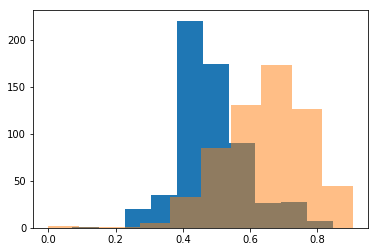

In [40]:
plt.hist(samples_smc)
plt.hist(samples_lmc, alpha = 0.5)

In [36]:
sampler_lmc.acceptance_fraction

array([0.76, 0.7 , 0.77, 0.72, 0.62, 0.8 ])

In [37]:
sampler_smc.acceptance_fraction

array([0.7 , 0.82, 0.67, 0.7 , 0.62, 0.65])

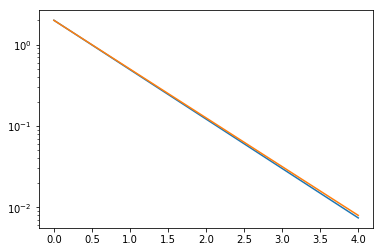

In [10]:
logg = np.linspace(0,4,100)
plt.plot(logg, 2*0.015**(1/3*logg))
plt.plot(logg, 10**(0.3 - 0.60*logg))
plt.yscale('log')

In [37]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

c1 = np.arange(-2, 2, 0.5)
c2 = np.arange(-2, 0, 0.5)
C1, C2 = np.meshgrid(c1, c2)
np.size(C1)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# detection_values = np.array()
# for i in c1:
#     for n in c2:
#         lmc_err_j = bayli.error_with_jitter(lmc['RADIAL_ERR'], i, n, lmc['LOGG'])
#         lmc_detection = bayli.binary_fraction(lmc['RADIALV'], lmc_err_j)
#         ax.scatter(i, c2, lmc_detection, c = 'C0')

32

In [23]:
bob = np.array([[0,1,2],[1,2,3],[3,2,4]])

In [26]:
bob = np.append(bob, [[3,1,2]], axis=0)

In [115]:
c1 = np.arange(-1, 1, 0.1)
c2 = np.arange(-1, 0, 0.1)
C1, C2 = np.meshgrid(c1, c2)
lmc_detection_rates = np.zeros((len(c1)*len(c2),3))
count = 0 
for i in c1:
    for n in c2:
        lmc_err_j = bayli.error_with_jitter(lmc['RADIAL_ERR'], i, n, lmc['LOGG'])
        lmc_detection = bayli.binary_fraction(lmc['RADIALV'], lmc_err_j)
        lmc_detection_rates[count,:] = i, n, lmc_detection
        count += 1

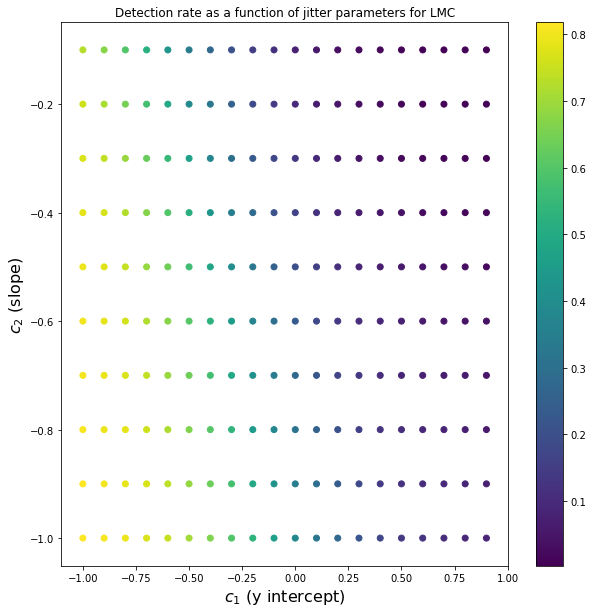

In [116]:
fig = plt.figure(figsize = (10,10))
plt.scatter(lmc_detection_rates[:,0], lmc_detection_rates[:,1], c = lmc_detection_rates[:,2])
plt.ylabel("$c_2$ (slope)", size = 16)
plt.xlabel("$c_1$ (y intercept)", size = 16)
plt.title("Detection rate as a function of jitter parameters for LMC")
plt.colorbar()

In [118]:
c1 = np.arange(-1, 1, 0.1)
c2 = np.arange(-1, 0, 0.1)
C1, C2 = np.meshgrid(c1, c2)
smc_detection_rates = np.zeros((len(c1)*len(c2),3))
count = 0 
for i in c1:
    for n in c2:
        smc_err_j = bayli.error_with_jitter(smc['RADIAL_ERR'], i, n, smc['LOGG'])
        smc_detection = bayli.binary_fraction(smc['RADIALV'], smc_err_j)
        smc_detection_rates[count,:] = i, n, smc_detection
        count += 1

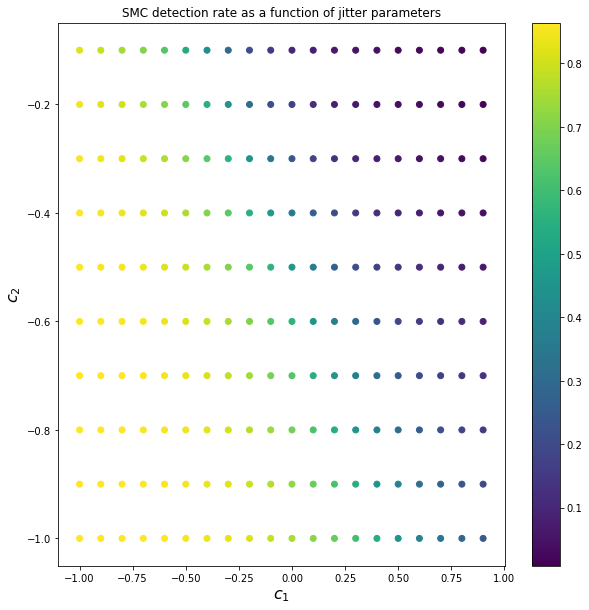

In [119]:
fig = plt.figure(figsize = (10,10))
plt.scatter(smc_detection_rates[:,0], smc_detection_rates[:,1], c = smc_detection_rates[:,2])
plt.ylabel("$c_2$", size = 16)
plt.xlabel("$c_1$", size = 16)
plt.title("SMC detection rate as a function of jitter parameters")
plt.colorbar()

Text(0.5, 1.0, 'LMC detection rates Contour')

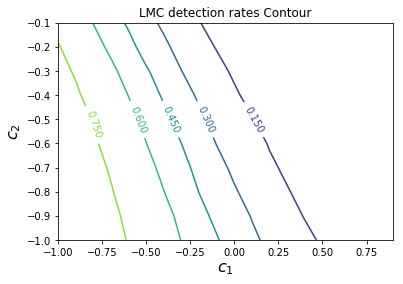

In [123]:
fig, ax = plt.subplots()
CS = ax.contour(C1, C2, np.reshape(lmc_detection_rates[:,2],np.shape(C1),  order='F'))
ax.clabel(CS, inline=1, fontsize=10)
plt.ylabel("$c_2$", size = 16)
plt.xlabel("$c_1$", size = 16)
ax.set_title('LMC detection rates Contour')

Text(0.5, 1.0, 'SMC detection rates Contour')

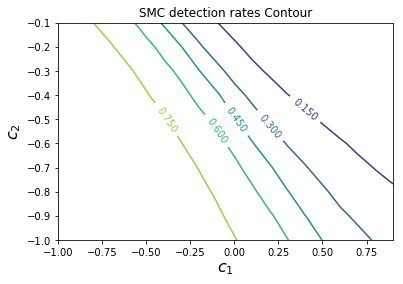

In [122]:
fig, ax = plt.subplots()
CS = ax.contour(C1, C2, np.reshape(smc_detection_rates[:,2],np.shape(C1),  order='F'))
ax.clabel(CS, inline=1, fontsize=10)
plt.ylabel("$c_2$", size = 16)
plt.xlabel("$c_1$", size = 16)
ax.set_title('SMC detection rates Contour')

In [100]:
C1

array([[-1.00000000e+00, -9.00000000e-01, -8.00000000e-01,
        -7.00000000e-01, -6.00000000e-01, -5.00000000e-01,
        -4.00000000e-01, -3.00000000e-01, -2.00000000e-01,
        -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
         2.00000000e-01,  3.00000000e-01,  4.00000000e-01,
         5.00000000e-01,  6.00000000e-01,  7.00000000e-01,
         8.00000000e-01,  9.00000000e-01],
       [-1.00000000e+00, -9.00000000e-01, -8.00000000e-01,
        -7.00000000e-01, -6.00000000e-01, -5.00000000e-01,
        -4.00000000e-01, -3.00000000e-01, -2.00000000e-01,
        -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
         2.00000000e-01,  3.00000000e-01,  4.00000000e-01,
         5.00000000e-01,  6.00000000e-01,  7.00000000e-01,
         8.00000000e-01,  9.00000000e-01],
       [-1.00000000e+00, -9.00000000e-01, -8.00000000e-01,
        -7.00000000e-01, -6.00000000e-01, -5.00000000e-01,
        -4.00000000e-01, -3.00000000e-01, -2.00000000e-01,
        -1.00000000e-01, -2.2

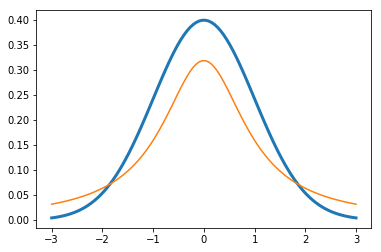

In [7]:
x=np.linspace(-3,3,100)
plt.plot(x, sps.norm.pdf(x, 0, 1), linewidth = 3)
plt.plot(x, sps.t.pdf(x,1))